Tabla Productos

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cambiar el directorio de trabajo
%cd /content/drive/MyDrive/TFM_FINAL

Mounted at /content/drive
/content/drive/MyDrive/TFM_FINAL


In [2]:
# Importamos las librerías a utilizar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Cargamos el archivo csv en un DataFrame
productos = pd.read_csv("Producto_Final.csv", encoding='utf-8', encoding_errors='replace')
#identificamos el tamaño del dataframe
print('El dataset esta compuesto por ', productos.shape[0],' filas y ',productos.shape[1],'columnas')
#Obtenemos los nombres de las columnas
print('Las columnas presentes en el dataset son: \n',productos.columns.tolist())
#mostramos las primeras 5 columnas del datafrma, para una visualización previa
productos.head()

El dataset esta compuesto por  2300  filas y  7 columnas
Las columnas presentes en el dataset son: 
 ['product_title', 'product_type', 'variant_sku', 'variant_id', 'variant_title', 'net_quantity', 'total_sales']


,product_title,product_type,variant_sku,variant_id,variant_title,net_quantity,total_sales
0,NaN,NaN,NaN,0,NaN,0,101764698.0
1,Carpa Instantanea Hornitos 6P - Atakama Outdoor,Carpa,CINHORVR_6P,40449703018653,NaN,109,20844704.0
2,Carpa Carelmapu 2p,Carpa,CCARELVR_2,34709539094685,NaN,148,16225954.0
3,PANTUFLA FUTALEUFÚ,Pantufla,PFUTNG_4344,0,Negra / 43-44,665,15012471.0
4,PANTUFLA FUTALEUFÚ,Pantufla,PFUTNG_4142,0,Negra / 41-42,658,14922810.0


In [4]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',productos.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {productos.duplicated().sum()}")

Recuento de Nans por columna: 
 product_title      1
product_type      80
variant_sku       15
variant_id         0
variant_title    262
net_quantity       0
total_sales        0
dtype: int64
El número de filas duplicadas: 0


In [5]:
print(productos.dtypes)

product_title     object
product_type      object
variant_sku       object
variant_id         int64
variant_title     object
net_quantity       int64
total_sales      float64
dtype: object


In [6]:
#Se eliminan estas dos columnas que vienen el dataset originalmente considerando que seran analisis a realizar a partir de la tabla ventas
#el total_sale presenta cantidad dado que es el costo de envio por eso no tiene un producto asociado
productos = productos.drop(['net_quantity', 'total_sales'], axis=1)

In [7]:
# Al ver que presenta Nans se decide tratar columnas que seran utilizadas posteriormente en el análisis
productos['categoria'] = productos['product_title'].str.split().str[0]
# Luego, llenar los valores NaN en 'product_type' con la primera palabra de 'product_title'
productos['product_type'].fillna(productos['categoria'], inplace=True)
productos.drop(columns=['categoria'], inplace=True)
# Reemplazar los valores NaN en 'product_title' con 'desconocido'
productos['variant_title'].fillna('desconocido', inplace=True)

In [8]:
#Para luego realizar cruce con la tabla de ventas validamos si existen valores repetido en la columna 'vaiant_sku'
valores_repetidos_variant_sku = productos['variant_sku'].value_counts()
print(valores_repetidos_variant_sku[valores_repetidos_variant_sku > 1])

variant_sku
MPOCHVRMG_16LT    24
MPOCHNAR_16LT     19
BAPROAZ           17
MPOCHAZ_16LT      16
TELQVR_XL         15
                  ..
LLMOSQAT           2
GBEALIM_CAF        2
BTNGTF_750         2
PCHCAFTRUF_L       2
BTVRPUM_1L         2
Name: count, Length: 396, dtype: int64


In [9]:
#Se identifican las filas duplicadas para comprender como gestionarlos
filas_duplicadas = productos[productos.duplicated(subset=['variant_sku'], keep=False)]
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by='variant_sku')
filas_duplicadas_ordenadas.head(20)

,product_title,product_type,variant_sku,variant_id,variant_title
123,Almohada Inflable Baker - Atakama Outdoor,Almohada,ABAKGR,31618297036896,Gris
292,Almohada inflable Baker,Almohada,ABAKGR,31618297036896,desconocido
222,Almohada Inflable Baker,Almohada,ABAKGR,31618297036896,desconocido
1695,Almohada inflable Baker,Almohadas,ABAKGR,43739004961003,desconocido
41,Almohada inflable Baker,Almohadas,ABAKGR,43754163437803,Gris claro
76,Almohada Inflable Baker,Almohada,ABAKGR,31618297036896,Gris
906,Almohada inflable Baker,Almohada,ABAKGR,43739004961003,desconocido
1658,Almohada autoinflable Trancura,Almohada,ALAUTRA_AZ,43739004469483,desconocido
803,Almohada Autoinflable Trancura,Almohada,ALAUTRA_AZ,43013449318635,desconocido
2143,Almohada autoinflable Trancura,Almohada,ALAUTRA_AZ,43739004469483,Azul marino


In [10]:
#Se eliminan los duplicados de la columna variant_sku
productos= productos.drop_duplicates(subset=['variant_sku'])

In [11]:
#A continuación se identifican los tipos de productos para lograr definir si se requiere alguna limpieza
valores_unicos = {col: productos[col].unique() for col in productos.columns}
for col, valores in valores_unicos.items():
    print(f"Valores únicos en la columna '{col}':\n{valores}\n")

Valores únicos en la columna 'product_title':
[nan 'Carpa Instantanea Hornitos 6P - Atakama Outdoor'
 'Carpa Carelmapu 2p' 'PANTUFLA FUTALEUFÚ'
 'Carpa Instantanea Portofino 4P - Atakama Outdoor'
 'Saco De Dormir Lauca -5 - Atakama Outdoor'
 'Saco de dormir Conguillío -8°' 'Saco de dormir Lauca -8°'
 'Mochila portabebé Leonera' 'Pantufla Futaleufú Negra - Atakama Outdoor'
 'Pantufla Futaleufú adulto' 'Mochila mochilera Torres del Paine 60+10 Lt'
 'Pantufla Futaleufú Negra' 'Mochila Cochamó 25L'
 'Silla Camping Llaima Single XL - Atakama Outdoor'
 'Tetera Plegable Breva'
 'Pantufla Futaleufú Verde Animal Print - Atakama Outdoor'
 'Mochila outdoor/urbana Cochamó 25 Lt' 'Carpa Totoralillo 4P'
 'Manta térmica multifuncional Nalca' 'Almohada inflable Baker'
 'Mochila Plegable Carbon 28L'
 'Manta Térmica Nalca Verde - Atakama Outdoor'
 'Pantufla Futaleufú Camo - Atakama Outdoor' 'Bolso Duffel Ruta 68'
 'Botella Térmica Peulla 1L'
 'Pantufla Futaleufú Cafe Animal Print - Atakama Outdoor'
 'Si

In [12]:
#Al identificar nombres similares se decide unificar terminos
productos['product_type'] = productos['product_type'].str.strip().str.lower()
mapeo = {
    'pantuflas': ['pantufla', 'pantuflass'],
    'toallas': ['toalla'],
    'vasos': ['vaso'],
    'sillas': ['silla'],
    'bandanas': ['bandana'],
    'bolsos': ['bolso', 'bolsoss'],
    'botellas': ['botella', 'botellass',' botella','botella ',' botella '],
    'cafeteras': ['cafetera', 'cafeterass'],
    'carpas': ['carpa', 'carpass'],
    'sacos de dormir': ['saco de dormir', 'saco'],
    'linternas': ['linterna'],
    'mochilas': ['mochila'],
    'donación': ['donar:', 'donacion'],
    'hamacas': ['hamacass','hamaca'],
    'poleras': ['polera manga corta','polera manga larga','primera capa'],
    'parka': ['chaqueta parka'],
    'gorros y jockeys': ['jockeyss','jockey','gorros','deporte / deporte masculino / accesorios / jockeys y gorros','jockeys','beanie'],
    'tazón': ['taza','mug'],
    'ollas': ['olla', 'ollass'],
}
def mapear_producto(producto, mapeo):
    for clave, valores in mapeo.items():
        if producto in valores:
            return clave
    return producto
productos['product_type'] = productos['product_type'].apply(lambda x: mapear_producto(x, mapeo))
print(productos['product_type'].unique())

[nan 'carpas' 'pantuflas' 'sacos de dormir' 'mochilas' 'sillas' 'tetera'
 'manta térmica' 'almohadas' 'bolsos' 'botella térmica' 'linternas'
 'banano plegable' 'poncho' 'cocinilla' 'set bowls' 'hamacas'
 'colchonetas' 'mesas' 'ollas' 'cubiertos' 'toallas' 'cafeteras' 'coolers'
 'vasos' 'botellas' 'vasos térmicos' 'termos' 'bolsa seca'
 'gorros y jockeys' 'bananos' 'bastones' 'lámparas' 'bandanas' 'materas'
 'tazón' 'neceseres' 'poleras' 'matera térmica' 'basureros' 'parka'
 'mosqueton' 'materiales de embalaje' 'donación' 'pack' 'plato'
 'ropa y accesorios' 'calza deportiva' 'pantalón de trekking' 'polars'
 'cortavientos' 'guantes' 'calcetines' 'linterna+bolsa seca 15l'
 'stickers' 'test']


In [13]:
productos = productos.dropna(subset=['product_type'])

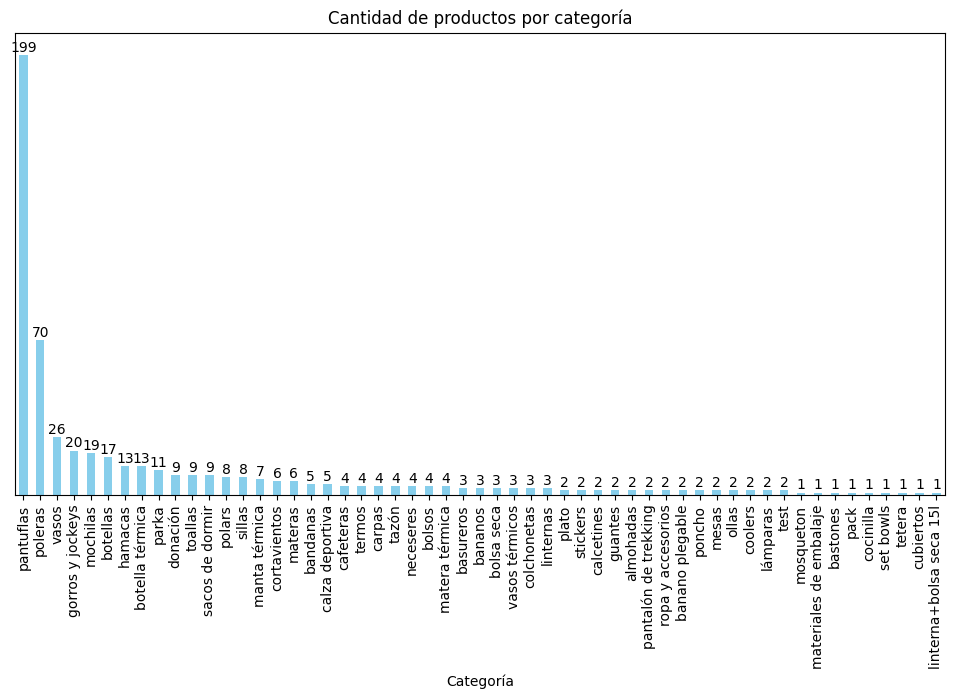

In [14]:
#Se busca ver la variedad de categorias existentes en el dataset
# Gráfico de barras Producto_type
plt.figure(figsize=(12, 6))
bar_plot = productos['product_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('')
for index, value in enumerate(productos['product_type'].value_counts()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
bar_plot.yaxis.set_visible(False)
plt.show()

In [15]:
#n° de productos existentes
productos['product_title'] = productos['product_title'].str.strip().str.lower()
print(f"Número de valores únicos en 'product_title': {productos['product_title'].nunique()}")
print(f"Número de valores únicos en 'variant_sku': {productos['variant_sku'].nunique()}")
print(f"Número de valores únicos en 'variant_sku': {productos['product_type'].nunique()}")

Número de valores únicos en 'product_title': 247
Número de valores únicos en 'variant_sku': 543
Número de valores únicos en 'variant_sku': 55


In [16]:
conteo_product_title = productos.groupby('product_title').size()
conteo_product_title_ordenado = conteo_product_title.sort_values(ascending=False)
print("Listado completo de product_title con sus conteos ordenados usando groupby y size:")
print(conteo_product_title_ordenado)

Listado completo de product_title con sus conteos ordenados usando groupby y size:
product_title
pantufla futaleufú niños                    30
pantufla futaleufú adulto                   27
pantufla futaleufú                          18
pantufla loa - outlet                       14
pantuflas térmicas futaleufú nu-b foam      13
                                            ..
linterna alma + bolsa seca yelcho 15lt       1
linterna frontal alma 170 lm                 1
linterna ledline cruz del sur 300lxmetro     1
linterna solar inflable gemini               1
vaso térmico trametes versicolor 350 ml      1
Length: 247, dtype: int64


Tabla Clientes

In [17]:
# Cargamos el archivo csv en un DataFrame
clientes = pd.read_csv('Clientes_Final.csv', delimiter=';')
#identificamos el tamaño del dataframe
print('El dataset esta compuesto por ', clientes.shape[0],' filas y ',clientes.shape[1],'columnas')
#Obtenemos los nombres de las columnas
print('Las columnas presentes en el dataset son: \n',clientes.columns.tolist())
#mostramos las primeras 5 columnas del datafrma, para una visualización previa
clientes.head()

El dataset esta compuesto por  44032  filas y  20 columnas
Las columnas presentes en el dataset son: 
 ['Customer ID', 'First Name', 'Last Name', 'Email', 'Accepts Email Marketing', 'Default Address Company', 'Default Address Address1', 'Default Address Address2', 'Default Address City', 'Default Address Province Code', 'Default Address Country Code', 'Default Address Zip', 'Default Address Phone', 'Phone', 'Accepts SMS Marketing', 'Total Spent', 'Total Orders', 'Note', 'Tax Exempt', 'Tags']


,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Company,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,Note,Tax Exempt,Tags
0,'2799265480800,carlos,ossa,carlos.ossa1@gmail.com,yes,NaN,NAVIDAD 1200,1003,Vitacura,RM,CL,172682219,'982489709,'+56982489709,no,51465.0,3.0,NaN,no,NaN
1,'2894853013600,prueba,prueba,prueba@gmail.com,no,NaN,prueba,NaN,prueba,RM,CL,SANTIAGO,'1111 111 111,NaN,no,0.0,1.0,NaN,no,NaN
2,'2934027092064,Felipe,Moreno,hola@gmail.com,no,NaN,Prueba,NaN,Las condes,RM,CL,SANTIAGO,NaN,NaN,no,0.0,0.0,NaN,no,NaN
3,'2936879054944,Zamiz,Tobar (Shipit),zamiz@shipit.cl,no,NaN,Apoquindo 4499,Piso 13,Valdivia,LR,CL,569630000,'56963000000,NaN,no,0.0,0.0,NaN,no,NaN
4,'2945859321952,Baltazar,Drapela,bdrapela@uc.cl,yes,NaN,Urmeneta 5,NaN,Puerto Montt,LL,CL,NaN,'966771642,NaN,no,0.0,3.0,NaN,no,NaN


In [18]:
#Para lograr identificar si se requiere realizar cambio en el tipo de dato
tipo_datos = clientes.dtypes
print(tipo_datos)

Customer ID                       object
First Name                        object
Last Name                         object
Email                             object
Accepts Email Marketing           object
Default Address Company           object
Default Address Address1          object
Default Address Address2          object
Default Address City              object
Default Address Province Code     object
Default Address Country Code      object
Default Address Zip               object
Default Address Phone             object
Phone                             object
Accepts SMS Marketing             object
Total Spent                      float64
Total Orders                     float64
Note                             float64
Tax Exempt                        object
Tags                              object
dtype: object


In [19]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',clientes.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {clientes.duplicated().sum()}")

Recuento de Nans por columna: 
 Customer ID                          0
First Name                        4992
Last Name                         4991
Email                                3
Accepts Email Marketing              1
Default Address Company          41750
Default Address Address1         11979
Default Address Address2         25635
Default Address City             11965
Default Address Province Code    11974
Default Address Country Code     11210
Default Address Zip              16858
Default Address Phone            12233
Phone                            37304
Accepts SMS Marketing                8
Total Spent                          8
Total Orders                         8
Note                             44032
Tax Exempt                           8
Tags                             37060
dtype: int64
El número de filas duplicadas: 0


In [20]:
#Se genera una nueva columna en la cual se identifique el nombre completo de los clientes
clientes['full name'] = clientes['First Name'] + ' ' + clientes['Last Name']
#Una vez ya se tiene la columna eliminamos las dos de los nombres y columnas que no seran requeridas para


In [21]:
print(clientes['Tax Exempt'].unique())
print(clientes['Tags'].unique())
print(clientes['Default Address Company'].unique())

['no' nan]
[nan 'retiro' 'newsletter' 'Shopify Chat' 'newsletter, Pantufla, retiro'
 'Pantufla' 'Wrote Judge.me web review' 'Pantufla, retiro'
 'newsletter, retiro' 'newsletter, Pantufla' 'Inbox online store chat'
 'Wrote Judge.me email review'
 'retiro, Wrote Judge.me email review, Wrote Judge.me web review'
 'Wrote Judge.me email review, Wrote Judge.me web review'
 'Inbox online store chat, Pantufla, retiro, Shopify Chat, TEST'
 'retiro, Wrote Judge.me email review'
 'Pantufla, Wrote Judge.me email review'
 'newsletter, retiro, Wrote Judge.me email review' 'TEST' 'retiro, TEST'
 'retiro, Wrote Judge.me web review']
[nan '84B' 'Depto 414' ... 'Condominio Costa Mar Depto. 201-B'
 'Depto 1802' 'Condominio gran roble 3215 torre B']


In [22]:
clientes = clientes.drop(['First Name', 'Last Name','Note','Tax Exempt','Tags','Default Address Company','Default Address Country Code'], axis=1)

In [23]:
#Al observar que se presentan Nan en la data se procupara revisar cual es la información que no se detecta
filas_Nan = clientes[clientes.isna().any(axis=1)]
print("DataFrame con filas que contienen valores NaN en alguna columna:")
filas_Nan.head(80)

DataFrame con filas que contienen valores NaN en alguna columna:


,Customer ID,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,full name
1,'2894853013600,prueba@gmail.com,no,prueba,NaN,prueba,RM,SANTIAGO,'1111 111 111,NaN,no,0.0,1.0,prueba prueba
2,'2934027092064,hola@gmail.com,no,Prueba,NaN,Las condes,RM,SANTIAGO,NaN,NaN,no,0.0,0.0,Felipe Moreno
3,'2936879054944,zamiz@shipit.cl,no,Apoquindo 4499,Piso 13,Valdivia,LR,569630000,'56963000000,NaN,no,0.0,0.0,Zamiz Tobar (Shipit)
4,'2945859321952,bdrapela@uc.cl,yes,Urmeneta 5,NaN,Puerto Montt,LL,NaN,'966771642,NaN,no,0.0,3.0,Baltazar Drapela
5,'2946000322656,ignacioruizvidela@gmail.com,no,Max opazo 501,Casa segundo piso sin numero café,Gorbea,AR,GORBEA,'9 3777 9412,NaN,no,0.0,0.0,Ignacio Ruiz Videla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,'2962840027232,godie.pinoc@gmail.com,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,0.0,0.0,NaN
84,'2962991644768,onavarro@udec.cl,no,Eleuterio ramirez 1555,NaN,Puerto aysen,AI,PUERTO AYSEN,'9 9214 7426,NaN,no,0.0,0.0,Oscar matias Navarro zambrano
85,'2962992562272,danaea.lafer@gmail.com,no,Quebrada de vitor #1114,NaN,Peñalolén,RM,SANTIAGO,'9 4442 3265,NaN,no,17959.0,1.0,Danae Lagos
86,'2963005800544,nicojordan1@hotmail.com,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,0.0,0.0,NaN


In [24]:
#Validamos que en el Id usuario no existan duplicados ya que es lo que nos permitira unir con la tabla de ventas
duplicados = clientes['Customer ID'].duplicated()
cantidad_duplicados = duplicados.sum()
print(f"La cantidad de duplicados en la columna 'id_cliente' es: {cantidad_duplicados}")

La cantidad de duplicados en la columna 'id_cliente' es: 0


In [25]:
#Se detecta que el Customer ID se extrae con una ' por lo cual buscamos eliminarla
clientes['Customer ID'] = clientes['Customer ID'].str.replace("'", '')

In [26]:
# Para lograr identificar cuales son información faltante se reemplaza los NaN en las columnas seleccionadas con 'desconocido'
columns_to_replace = ['Email', 'Accepts Email Marketing',
                      'Default Address Address1', 'Default Address Address2', 'Default Address City',
                      'Default Address Province Code', 'Default Address Zip', 'Default Address Phone',
                      'Phone', 'Accepts SMS Marketing']
clientes[columns_to_replace] = clientes[columns_to_replace].fillna('Desconocido')

In [27]:
clientes['Total Spent'] = clientes['Total Spent'].fillna(0)
clientes['Total Orders'] = clientes['Total Orders'].fillna(0)

In [28]:
#Debido que se observar pruebas en los datos se eliminan del dataset
clientes = clientes[~clientes['Default Address Address1'].str.contains('prueba', case=False, na=False)]
clientes = clientes[~clientes['full name'].str.contains('prueba', case=False, na=False)]
print(f"Total de filas después de eliminar las que contienen 'prueba': {clientes.shape[0]}")

Total de filas después de eliminar las que contienen 'prueba': 44022


In [29]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',clientes.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {clientes.duplicated().sum()}")

Recuento de Nans por columna: 
 Customer ID                         0
Email                               0
Accepts Email Marketing             0
Default Address Address1            0
Default Address Address2            0
Default Address City                0
Default Address Province Code       0
Default Address Zip                 0
Default Address Phone               0
Phone                               0
Accepts SMS Marketing               0
Total Spent                         0
Total Orders                        0
full name                        4993
dtype: int64
El número de filas duplicadas: 0


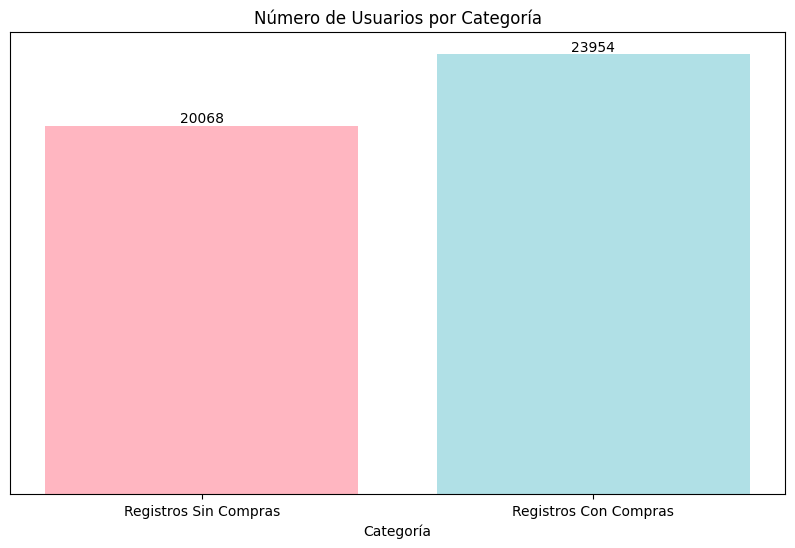

In [30]:
#Se requiere saber cuantos usuarios solamente estan inscritos y cuales son los que si han realizado una compra en el Ecommerce
usuarios_sin_compras = clientes[(clientes['Total Spent'] == 0) & (clientes['Total Orders'] == 0)]
usuarios_con_compras = clientes[(clientes['Total Spent'] > 0) | (clientes['Total Orders'] > 0)]
num_usuarios_sin_compras = usuarios_sin_compras.shape[0]
num_usuarios_con_compras = usuarios_con_compras.shape[0]
categorias = ['Registros Sin Compras', 'Registros Con Compras']
cantidad = [num_usuarios_sin_compras, num_usuarios_con_compras]
plt.figure(figsize=(10, 6))
bars = plt.bar(categorias, cantidad, color=['#FFB6C1', '#B0E0E6'])
plt.title('Número de Usuarios por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Usuarios')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [31]:
email_sin_compras = usuarios_sin_compras['Accepts Email Marketing'].value_counts()
email_con_compras = usuarios_con_compras['Accepts Email Marketing'].value_counts()

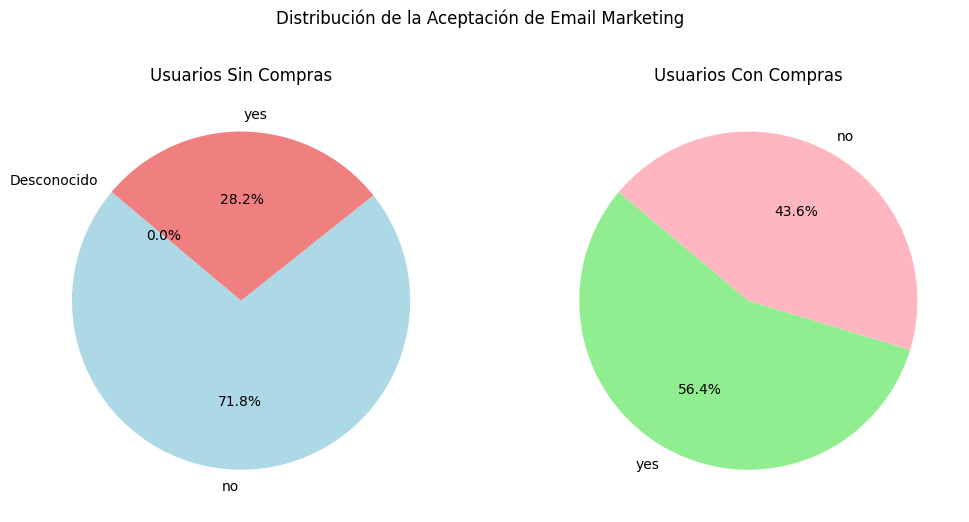

In [32]:
# Usuarios Sin Compras
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(email_sin_compras, labels=email_sin_compras.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Usuarios Sin Compras')

# Usuarios Con Compras
plt.subplot(1, 2, 2)
plt.pie(email_con_compras, labels=email_con_compras.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightpink'])
plt.title('Usuarios Con Compras')
plt.suptitle('Distribución de la Aceptación de Email Marketing')
plt.show()


In [33]:
cliente_id_buscar = 4527423422621

# Filtrar y obtener la fila completa donde customer_id es igual al ID especificado
fila_cliente = clientes[clientes['Customer ID'] == cliente_id_buscar]

# Verificar si la fila existe y mostrar el resultado
if not fila_cliente.empty:
    print(f"Fila completa para el cliente con ID {cliente_id_buscar}:")
    print(fila_cliente)
else:
    print(f"No se encontró ningún cliente con el ID {cliente_id_buscar}.")

No se encontró ningún cliente con el ID 4527423422621.


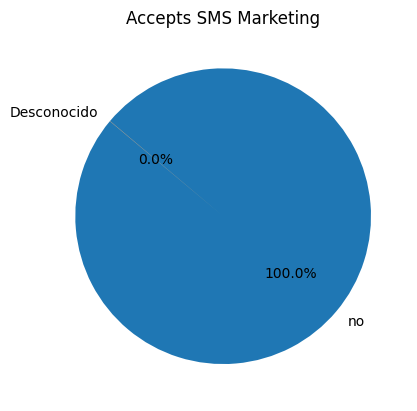

In [34]:
#Se busca identificar como distribuye la aceptación de SMS para promociones
sms_marketing = clientes['Accepts SMS Marketing'].value_counts()
sms_marketing.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Accepts SMS Marketing')
plt.ylabel('')
plt.show()


In [35]:
#Obtenemos el porcentaje del total de usuarios/clientes que aceptaron o no correos por email
frequencies = (clientes['Accepts Email Marketing'].value_counts(normalize=True) * 100).round(1)
table = frequencies.reset_index()
table.columns = ['Accepts Email Marketing', 'Percentage']
print(table)

  Accepts Email Marketing  Percentage
0                      no        56.5
1                     yes        43.5
2             Desconocido         0.0


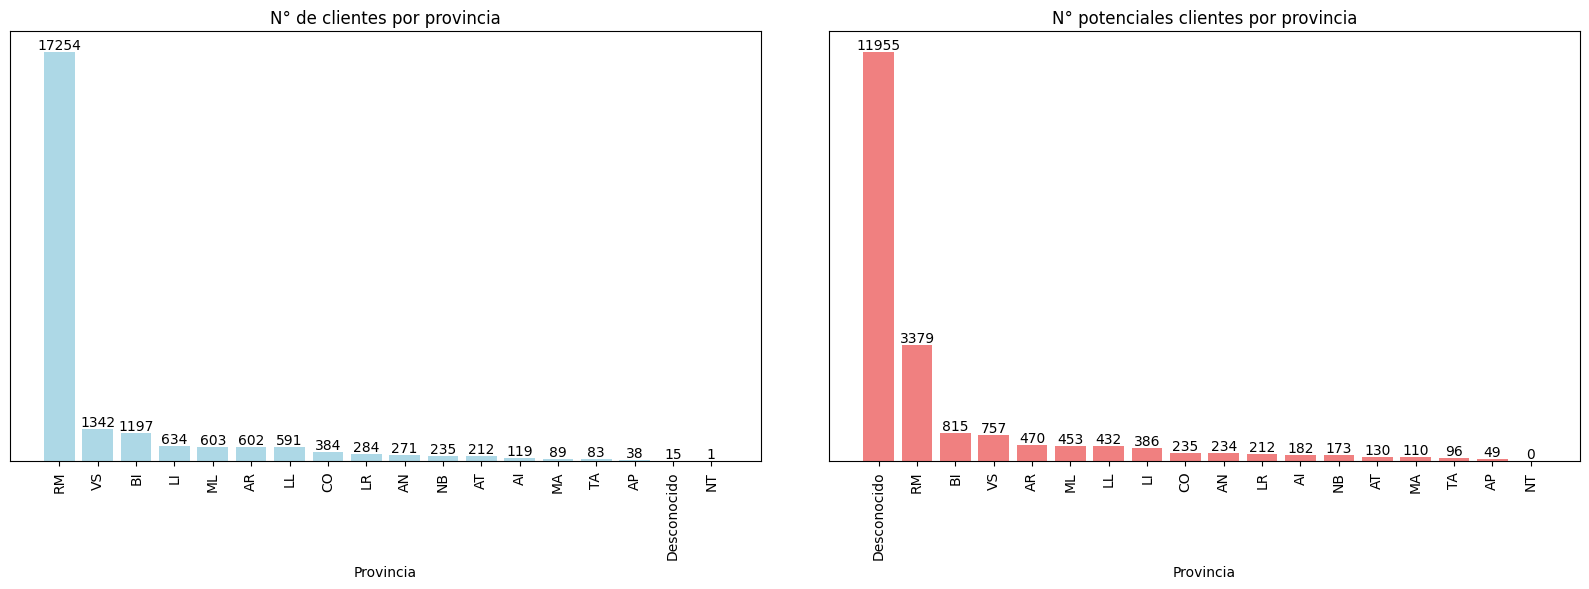

In [36]:
#Se busca ver como distribuyen tanto potenciales compradores como los clientes de la tienda por región
clientes['Compras'] = (clientes['Total Spent'] > 0) | (clientes['Total Orders'] > 0)
clientes_por_provincia = clientes.groupby(['Default Address Province Code', 'Compras']).size().unstack(fill_value=0)
provincias = clientes['Default Address Province Code'].unique()
clientes_con_compras = clientes_por_provincia[True].reindex(provincias, fill_value=0).sort_values(ascending=False)
clientes_sin_compras = clientes_por_provincia[False].reindex(provincias, fill_value=0).sort_values(ascending=False)
plt.figure(figsize=(16, 6))

#Grafico de usaurios registrados con compra
plt.subplot(1, 2, 1)
bars1 = plt.bar(clientes_con_compras.index, clientes_con_compras, color='lightblue')
plt.xlabel('Provincia')
plt.title('N° de clientes por provincia')
plt.xticks(rotation=90)
plt.tight_layout()
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.gca().axes.get_yaxis().set_visible(False)

#Grafico de usaurios registrados sin compra
plt.subplot(1, 2, 2)
bars2 = plt.bar(clientes_sin_compras.index, clientes_sin_compras, color='lightcoral')
plt.xlabel('Provincia')
plt.title('N° potenciales clientes por provincia')
plt.xticks(rotation=90)
plt.tight_layout()
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

TABLA VENTAS

In [37]:
# Cargamos el archivo csv en un DataFrame
ventas = pd.read_csv("Venta_Final.csv", encoding='utf-8', encoding_errors='replace')
#identificamos el tamaño del dataframe
print('El dataset esta compuesto por ', ventas.shape[0],' filas y ',ventas.shape[1],'columnas')
#Obtenemos los nombres de las columnas
print('Las columnas presentes en el dataset son: \n',ventas.columns.tolist())
#mostramos las primeras 5 columnas del datafrma, para una visualización previa
ventas.head()

El dataset esta compuesto por  89495  filas y  28 columnas
Las columnas presentes en el dataset son: 
 ['month', 'product_id', 'order_id', 'order_name', 'variant_sku', 'financial_status', 'customer_id', 'referrer_source', 'referring_channel', 'referring_traffic', 'shipping_region', 'referring_category', 'referrer_path', 'utm_campaign_content', 'utm_campaign_medium', 'utm_campaign_name', 'utm_campaign_source', 'utm_campaign_term', 'sale_line_type', 'sale_kind', 'orders', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales']


,month,product_id,order_id,order_name,variant_sku,financial_status,customer_id,referrer_source,referring_channel,referring_traffic,...,sale_line_type,sale_kind,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,2020-01,0,2079585665120,#1003,OPMQAZ_2LT,paid,2946064056416,Search,google,organic,...,product,order,1,32990.0,0.0,0.0,32990.0,0.0,0.0,32990.0
1,2020-01,4447027724384,2079585665120,#1003,SETBLUC_2,paid,2946064056416,Search,google,organic,...,product,order,1,14990.0,0.0,0.0,14990.0,0.0,0.0,14990.0
2,2020-01,4447027462240,2083701194848,#AO1007,ABAKGR,paid,2949954469984,Search,google,organic,...,product,order,1,12990.0,-2598.0,0.0,10392.0,0.0,0.0,10392.0
3,2020-01,0,2079338758240,#1002,NaN,voided,2945859321952,Direct,direct,direct,...,shipping,return,0,0.0,0.0,0.0,0.0,-3718.0,0.0,-3718.0
4,2020-01,0,2079338758240,#1002,NaN,voided,2945859321952,Direct,direct,direct,...,shipping,order,0,0.0,0.0,0.0,0.0,3718.0,0.0,3718.0


In [38]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',ventas.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {ventas.duplicated().sum()}")

Recuento de Nans por columna: 
 month                       0
product_id                  0
order_id                    0
order_name                  0
variant_sku             34014
financial_status            0
customer_id                 0
referrer_source             0
referring_channel           0
referring_traffic           0
shipping_region         10740
referring_category      42732
referrer_path           36682
utm_campaign_content    81326
utm_campaign_medium     77755
utm_campaign_name       80171
utm_campaign_source     76638
utm_campaign_term       87554
sale_line_type              0
sale_kind                   0
orders                      0
gross_sales                 0
discounts                   0
returns                     0
net_sales                   0
shipping                    0
taxes                       0
total_sales                 0
dtype: int64
El número de filas duplicadas: 0


In [39]:
#A continuación se identifican los tipos de productos para lograr definir si se requiere alguna limpieza
valores_unicos_ventas = {col: ventas[col].unique() for col in ventas.columns}
for col, valores in valores_unicos_ventas.items():
    print(f"Valores únicos en la columna '{col}':\n{valores}\n")

Valores únicos en la columna 'month':
['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09'
 '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06'
 '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12' '2024-01'
 '2024-02' '2024-03' '2024-04']

Valores únicos en la columna 'product_id':
[            0 4447027724384 4447027462240 4447027658848 4447027560544
 4447027495008 4448121454688 4447027626080 4448121487456 4570616135776
 4447027593312 5407486115997 4595747061856 4595639681120 5408103628957
 5715312509085 5714858246301 4595716522080 5715299500189 5715271811229
 5715297992861 5714870468765 5714849857693 5715203457181 4595716227168
 5297729208477 6628077174941 65957

In [40]:
#Se obtiene la cantidad de los valores unicos existentes en la variable sale_line_type
#Esto dado que en el dataset se encuentra tambien en la tabla de ventas los envios que se encuentran en la variable Shipping
conteo_valores_ventas = ventas['sale_line_type'].value_counts()
print(conteo_valores_ventas)

sale_line_type
product     55504
shipping    33769
unknown       215
tip             7
Name: count, dtype: int64


In [41]:
condicion = (ventas['orders'] == 0) & \
            (ventas['gross_sales'] == 0) & \
            (ventas['discounts'] == 0) & \
            (ventas['returns'] == 0) & \
            (ventas['net_sales'] == 0) & \
            (ventas['shipping'] == 0) & \
            (ventas['referrer_source'] == 0) & \
            (ventas['referring_channel'] == 0) & \
            (ventas['referring_traffic'] == 0) & \
            (ventas['taxes'] == 0) & \
            (ventas['total_sales'] == 0)
# Asignar 'retiro_en_tienda' a la columna 'variant_sku' donde se cumple la condición
ventas.loc[condicion, 'variant_sku'] = 'retiro_en_tienda'
ventas.loc[(ventas['sale_line_type'] =='shipping' ) & (~condicion), 'variant_sku'] = 'Envío'
condicion2 = (ventas['orders'] == 1) & \
           (ventas['gross_sales'] == 0) & \
            (ventas['discounts'] == 0) & \
            (ventas['returns'] == 0) & \
            (ventas['net_sales'] == 0) & \
            (ventas['shipping'] == 0) & \
            (ventas['taxes'] == 0) & \
            (ventas['total_sales'] == 0)
ventas.loc[condicion2, 'variant_sku'] = 'retiro_en_tienda'
condicion1 = (ventas['orders'] == 0) & \
            (ventas['gross_sales'] == 0) & \
            (ventas['discounts'] == 0) & \
            (ventas['returns'] == 0) & \
            (ventas['net_sales'] == 0) & \
            (ventas['shipping'] == 0) & \
            (ventas['taxes'] == 0) & \
            (ventas['total_sales'] == 0)
ventas.loc[condicion1, 'variant_sku'] = 'retiro_en_tienda'

In [42]:
ventas['variant_sku'] = ventas['variant_sku'].fillna('Sin identificar')

In [43]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',ventas.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {ventas.duplicated().sum()}")

Recuento de Nans por columna: 
 month                       0
product_id                  0
order_id                    0
order_name                  0
variant_sku                 0
financial_status            0
customer_id                 0
referrer_source             0
referring_channel           0
referring_traffic           0
shipping_region         10740
referring_category      42732
referrer_path           36682
utm_campaign_content    81326
utm_campaign_medium     77755
utm_campaign_name       80171
utm_campaign_source     76638
utm_campaign_term       87554
sale_line_type              0
sale_kind                   0
orders                      0
gross_sales                 0
discounts                   0
returns                     0
net_sales                   0
shipping                    0
taxes                       0
total_sales                 0
dtype: int64
El número de filas duplicadas: 0


In [44]:
#Se transforman las columnas a valor entero para lograr procesar los datos de manera correspondiente
columnas_entero = ['gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales']
ventas[columnas_entero] = ventas[columnas_entero].astype(int)

In [45]:
# Dado que se crea un nuevo Product ID para la variable_sku es envio con la finalidad de asignar un valor especifico
ventas.loc[ventas['variant_sku'] == 'Envío', 'product_id'] = 123456789101
ventas.loc[ventas['variant_sku'] == 'retiro_en_tienda', 'product_id'] = 123456789101
#Existe en el dataset un producto que es la bolsa
ventas.loc[ventas['variant_sku'] == 'YELVR15L17', 'product_id'] = ventas.loc[ventas['variant_sku'] == 'YELVR15L17', 'product_id'] + 12345678998

In [46]:
#Para tratar los datos de las siguientes columnas se considero realizarlo el reemplazo con sin utm
columnas_ = ['utm_campaign_medium', 'utm_campaign_source', 'utm_campaign_name','utm_campaign_term', 'utm_campaign_content']
ventas[columnas_] = ventas[columnas_].fillna('Sin UTM')

In [47]:
llenado_refer = ['referring_category','referrer_path']
ventas[llenado_refer] = ventas[llenado_refer].fillna('')

In [48]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',ventas.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {ventas.duplicated().sum()}")
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',clientes.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {clientes.duplicated().sum()}")
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',productos.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {productos.duplicated().sum()}")

Recuento de Nans por columna: 
 month                       0
product_id                  0
order_id                    0
order_name                  0
variant_sku                 0
financial_status            0
customer_id                 0
referrer_source             0
referring_channel           0
referring_traffic           0
shipping_region         10740
referring_category          0
referrer_path               0
utm_campaign_content        0
utm_campaign_medium         0
utm_campaign_name           0
utm_campaign_source         0
utm_campaign_term           0
sale_line_type              0
sale_kind                   0
orders                      0
gross_sales                 0
discounts                   0
returns                     0
net_sales                   0
shipping                    0
taxes                       0
total_sales                 0
dtype: int64
El número de filas duplicadas: 0
Recuento de Nans por columna: 
 Customer ID                         0
Email       

In [49]:
ventas['customer_id'] = ventas['customer_id'].astype(str)
print("Tipos de datos después de la conversión:\n", ventas.dtypes)
clientes['Customer ID'] = clientes['Customer ID'].astype(str)
print("Tipos de datos después de la conversión:\n", clientes.dtypes)

Tipos de datos después de la conversión:
 month                   object
product_id               int64
order_id                 int64
order_name              object
variant_sku             object
financial_status        object
customer_id             object
referrer_source         object
referring_channel       object
referring_traffic       object
shipping_region         object
referring_category      object
referrer_path           object
utm_campaign_content    object
utm_campaign_medium     object
utm_campaign_name       object
utm_campaign_source     object
utm_campaign_term       object
sale_line_type          object
sale_kind               object
orders                   int64
gross_sales              int64
discounts                int64
returns                  int64
net_sales                int64
shipping                 int64
taxes                    int64
total_sales              int64
dtype: object
Tipos de datos después de la conversión:
 Customer ID                       

In [50]:
ventas['customer_id'] = ventas['customer_id'].str.strip()
clientes['Customer ID'] = clientes['Customer ID'].str.strip()

In [51]:
df_ventas_clientes = ventas.merge(clientes, left_on='customer_id', right_on='Customer ID', how='left')
df_ventas_clientes.head()

,month,product_id,order_id,order_name,variant_sku,financial_status,customer_id,referrer_source,referring_channel,referring_traffic,...,Default Address City,Default Address Province Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,full name,Compras
0,2020-01,0,2079585665120,#1003,OPMQAZ_2LT,paid,2946064056416,Search,google,organic,...,Punta Arenas,MA,PUNTA ARENAS,'9 7897 2895,'+56978972895,no,58928.0,1.0,Jose Pérez,True
1,2020-01,4447027724384,2079585665120,#1003,SETBLUC_2,paid,2946064056416,Search,google,organic,...,Punta Arenas,MA,PUNTA ARENAS,'9 7897 2895,'+56978972895,no,58928.0,1.0,Jose Pérez,True
2,2020-01,4447027462240,2083701194848,#AO1007,ABAKGR,paid,2949954469984,Search,google,organic,...,Hualañe,ML,HUALAÑE,'9 3113 2387,'+56931132387,no,38955.0,1.0,Bastian Carreño,True
3,2020-01,123456789101,2079338758240,#1002,Envío,voided,2945859321952,Direct,direct,direct,...,Puerto Montt,LL,Desconocido,'966771642,Desconocido,no,0.0,3.0,Baltazar Drapela,True
4,2020-01,123456789101,2079338758240,#1002,Envío,voided,2945859321952,Direct,direct,direct,...,Puerto Montt,LL,Desconocido,'966771642,Desconocido,no,0.0,3.0,Baltazar Drapela,True


In [52]:
#Obtenemos las ventas totales percibidas
ventas_totales = df_ventas_clientes['total_sales'].sum()
print("Ventas totales:", ventas_totales)

Ventas totales: 1299374408


In [53]:
columnas_a_reemplazar = [
    'Customer ID', 'Email', 'Accepts Email Marketing', 'Default Address Address1',
    'Default Address Address2', 'Default Address City', 'Default Address Province Code',
    'Default Address Zip', 'Default Address Phone', 'Phone', 'Accepts SMS Marketing',
    'Total Spent', 'Total Orders', 'full name', 'Compras'
]
df_ventas_clientes[columnas_a_reemplazar] = df_ventas_clientes[columnas_a_reemplazar].fillna('Desconocido')

In [54]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',df_ventas_clientes.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {df_ventas_clientes.duplicated().sum()}")

Recuento de Nans por columna: 
 month                                0
product_id                           0
order_id                             0
order_name                           0
variant_sku                          0
financial_status                     0
customer_id                          0
referrer_source                      0
referring_channel                    0
referring_traffic                    0
shipping_region                  10740
referring_category                   0
referrer_path                        0
utm_campaign_content                 0
utm_campaign_medium                  0
utm_campaign_name                    0
utm_campaign_source                  0
utm_campaign_term                    0
sale_line_type                       0
sale_kind                            0
orders                               0
gross_sales                          0
discounts                            0
returns                              0
net_sales                       

In [55]:
df_final = df_ventas_clientes.merge(productos, on='variant_sku',how='left')
df_final.head()

,month,product_id,order_id,order_name,variant_sku,financial_status,customer_id,referrer_source,referring_channel,referring_traffic,...,Phone,Accepts SMS Marketing,Total Spent,Total Orders,full name,Compras,product_title,product_type,variant_id,variant_title
0,2020-01,0,2079585665120,#1003,OPMQAZ_2LT,paid,2946064056416,Search,google,organic,...,'+56978972895,no,58928.0,1.0,Jose Pérez,True,olla plegable maqui azul 2l,ollas,0.000000e+00,Azul claro
1,2020-01,4447027724384,2079585665120,#1003,SETBLUC_2,paid,2946064056416,Search,google,organic,...,'+56978972895,no,58928.0,1.0,Jose Pérez,True,set 2 bowl plegables lúcuma,set bowls,3.161830e+13,desconocido
2,2020-01,4447027462240,2083701194848,#AO1007,ABAKGR,paid,2949954469984,Search,google,organic,...,'+56931132387,no,38955.0,1.0,Bastian Carreño,True,almohada inflable baker,almohadas,4.375416e+13,Gris claro
3,2020-01,123456789101,2079338758240,#1002,Envío,voided,2945859321952,Direct,direct,direct,...,Desconocido,no,0.0,3.0,Baltazar Drapela,True,NaN,NaN,NaN,NaN
4,2020-01,123456789101,2079338758240,#1002,Envío,voided,2945859321952,Direct,direct,direct,...,Desconocido,no,0.0,3.0,Baltazar Drapela,True,NaN,NaN,NaN,NaN


In [56]:
# Solo para validar se comprueba que estos sean los mismos que quedaban como envio, retiro en tienda y sin informar de la tabla venta original
conteos = df_final['variant_sku'].value_counts()
print(f"Total de 'Envio', 'retiro_en_tienda' y 'Sin informacion': {conteos.get('Envío', 0)+conteos.get('retiro_en_tienda', 0)+conteos.get('Sin identificar', 0)}")

Total de 'Envio', 'retiro_en_tienda' y 'Sin informacion': 34580


In [57]:
#validamos si existenen NaNs
print('Recuento de Nans por columna: \n',df_final.isna().sum())
# Validados si existen filas duplicadas
print(f"El número de filas duplicadas: {df_final.duplicated().sum()}")

Recuento de Nans por columna: 
 month                                0
product_id                           0
order_id                             0
order_name                           0
variant_sku                          0
financial_status                     0
customer_id                          0
referrer_source                      0
referring_channel                    0
referring_traffic                    0
shipping_region                  10740
referring_category                   0
referrer_path                        0
utm_campaign_content                 0
utm_campaign_medium                  0
utm_campaign_name                    0
utm_campaign_source                  0
utm_campaign_term                    0
sale_line_type                       0
sale_kind                            0
orders                               0
gross_sales                          0
discounts                            0
returns                              0
net_sales                       

In [58]:
#Obtenemos los ingresos totales
print("El total de ingresos percibidos hasta la fecha es de $:", df_final['total_sales'].sum())

El total de ingresos percibidos hasta la fecha es de $: 1299374408


In [59]:
#Obtenemos n° de ordenes que se han gestionado a lo largo del tiempo
print("El total de ingresos percibidos hasta la fecha es de :", df_final['order_id'].nunique())

El total de ingresos percibidos hasta la fecha es de : 33372


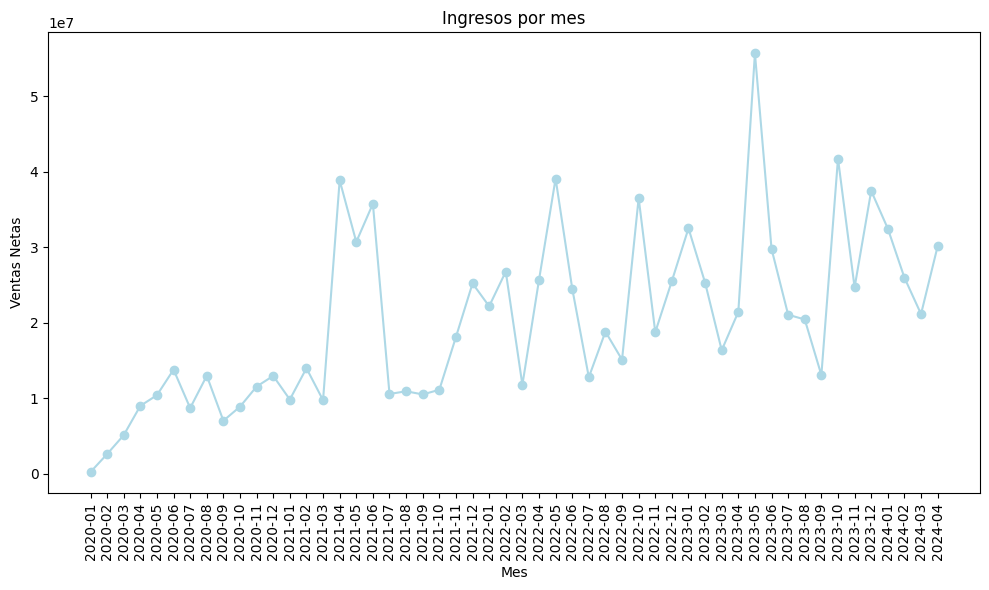

In [60]:
#Para esto inicialmente debemos convertir la variable month a formato fecha
df_final['month'] = pd.to_datetime(df_final['month'])
# Agrupamos las ventas por mes y calcular la suma de ventas netas
ventas_por_mes = ventas.groupby(df_final['month'].dt.to_period('M'))['net_sales'].sum()

# Gráfico de líneas de las ventas por mes
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes.index.astype(str), ventas_por_mes.values, marker='o', linestyle='-', color='lightblue')
plt.title('Ingresos por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Netas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [61]:
#Para obtener cual es el producto que realiza el enganche se filtrara para no considerar los envios y retiros en tienda
df_filtrado = df_final[~df_final['variant_sku'].str.contains('Envío|retiro_en_tienda', case=False, na=False)]
df_filtrado_copia = df_filtrado.copy()

In [62]:
#Obtenemos los ingresos totales sin considerar los envios
print("El total de ventas percibidas hasta la fecha es de $:", df_filtrado['total_sales'].sum())

El total de ventas percibidas hasta la fecha es de $: 1198382790


In [63]:
#Obtenemos n° de ordenes que se han gestionado a lo largo del tiempo
print("El total de ingresos percibidos hasta la fecha es de :", df_filtrado['order_id'].nunique())

El total de ingresos percibidos hasta la fecha es de : 33367


<ipython-input-64-75bbf2a3edc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['month'] = pd.to_datetime(df_filtrado['month'])


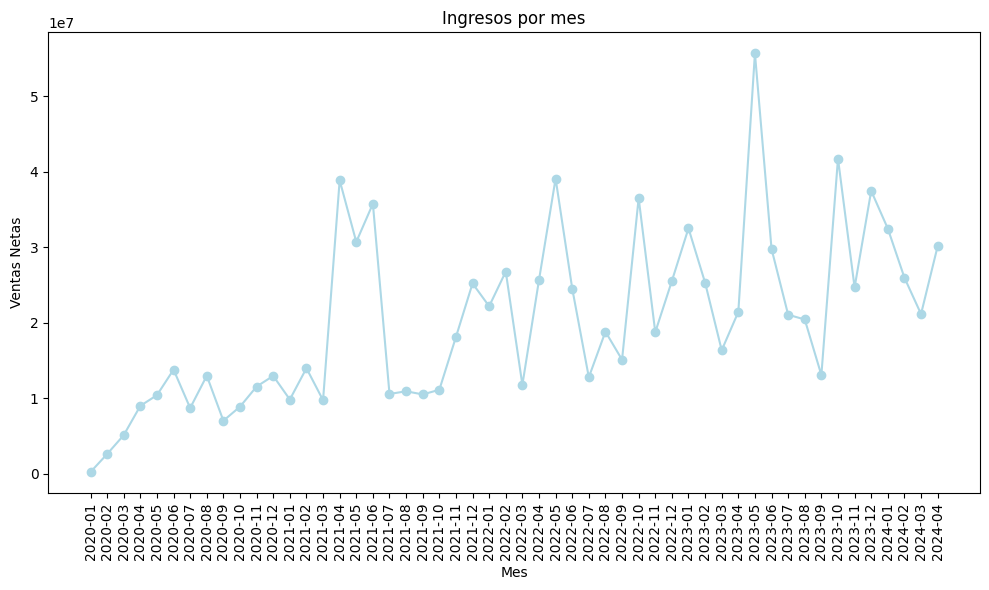

In [64]:
#Para esto inicialmente debemos convertir la variable month a formato fecha
df_filtrado['month'] = pd.to_datetime(df_filtrado['month'])
# Agrupamos las ventas por mes y calcular la suma de ventas netas
ventas_por_mes = ventas.groupby(df_filtrado['month'].dt.to_period('M'))['net_sales'].sum()

# Gráfico de líneas de las ventas por mes
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes.index.astype(str), ventas_por_mes.values, marker='o', linestyle='-', color='lightblue')
plt.title('Ingresos por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Netas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [65]:
df_envios = df_final[df_final['variant_sku'].str.contains('Envío|retiro_en_tienda', case=False, na=False)]

In [66]:
#Obtenemos los ingresos totales sin considerar los envios
print("El total de ingresos por envio percibido hasta la fecha es de $:", df_envios['total_sales'].sum())

El total de ingresos por envio percibido hasta la fecha es de $: 100991618


ANALISIS POR PRODUCTO

In [67]:
#Ordenamos y agrupamos por customer_id, para encontrar la compra con el valor más alto
indice = df_filtrado.sort_values(by=['customer_id', 'month', 'total_sales'], ascending=[True, True, False]) \
                    .groupby('customer_id')['total_sales'].idxmax()
primera_compra = df_filtrado.loc[indice]
distribucion_producto = primera_compra['product_type'].value_counts()
distribucion_producto = distribucion_producto.reset_index()
distribucion_producto.columns = ['Product Type', 'N° de productos']
distribucion_producto['Percentage'] = (distribucion_producto['N° de productos'] / distribucion_producto['N° de productos'].sum()) * 100
print("Distribución de primeros productos comprados por clientes:")
print(distribucion_producto.to_string(index=False))

Distribución de primeros productos comprados por clientes:
           Product Type  N° de productos  Percentage
              pantuflas            13049   53.770397
               mochilas             2016    8.307236
                 carpas              980    4.038240
        sacos de dormir              824    3.395418
                 sillas              757    3.119334
        botella térmica              677    2.789682
                hamacas              596    2.455909
               botellas              479    1.973793
                 bolsos              473    1.949069
          manta térmica              425    1.751277
        banano plegable              391    1.611175
                  vasos              382    1.574089
                 tetera              351    1.446349
              almohadas              301    1.240316
                toallas              237    0.976595
              linternas              234    0.964233
                poleras              233

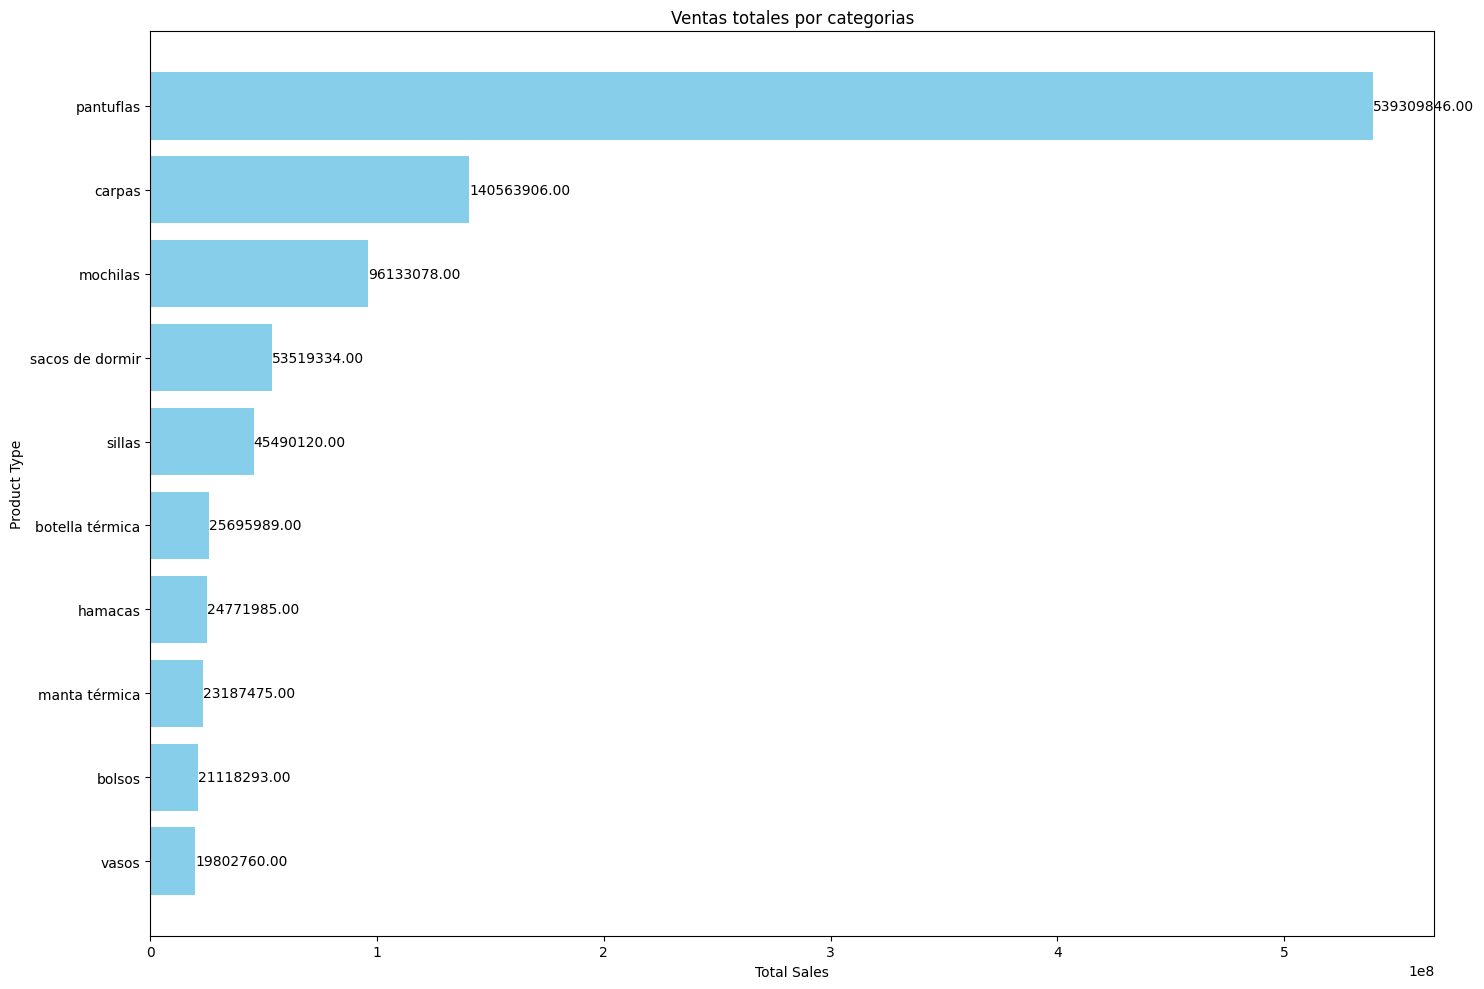

In [68]:
total_sales_por_tipo = df_filtrado.groupby('product_type')['total_sales'].sum()
total_sales_por_tipo = total_sales_por_tipo.sort_values(ascending=True).tail(10)
plt.figure(figsize=(15, 10))
bars = plt.barh(total_sales_por_tipo.index, total_sales_por_tipo.values, color='skyblue')
plt.title('Ventas totales por categorias')
plt.xlabel('Total Sales', fontsize=10)
plt.ylabel('Product Type', fontsize=10)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             '{:.2f}'.format(bar.get_width()),
             ha='left', va='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()

In [69]:
total_ventas = total_sales_por_tipo.sum()
porcentaje_ventas_por_tipo = (total_sales_por_tipo / total_ventas) * 100
tabla_porcentaje_ventas = pd.DataFrame({
    'Total Sales': total_sales_por_tipo,
    'Percentage of Total Sales (%)': porcentaje_ventas_por_tipo
})
tabla_porcentaje_ventas = tabla_porcentaje_ventas.sort_values(by='Total Sales', ascending=False)
print(tabla_porcentaje_ventas)

                 Total Sales  Percentage of Total Sales (%)
product_type                                               
pantuflas          539309846                      54.498159
carpas             140563906                      14.204217
mochilas            96133078                       9.714408
sacos de dormir     53519334                       5.408218
sillas              45490120                       4.596852
botella térmica     25695989                       2.596623
hamacas             24771985                       2.503250
manta térmica       23187475                       2.343133
bolsos              21118293                       2.134039
vasos               19802760                       2.001102


In [70]:
#Al obtener tanto los primeros productos comprados por los clientes como los que generan mayores ingresos para el ecommerce se realiza un análisis más detalla respecto a estos.

PANTUFLAS

In [71]:
df_filtrado_copia['combined_title'] = df_filtrado_copia['product_title'].astype(str) + " - " + df_filtrado_copia['variant_title'].astype(str)
df_filtrado_copia[['product_title', 'variant_title', 'combined_title']].head()

,product_title,variant_title,combined_title
0,olla plegable maqui azul 2l,Azul claro,olla plegable maqui azul 2l - Azul claro
1,set 2 bowl plegables lúcuma,desconocido,set 2 bowl plegables lúcuma - desconocido
2,almohada inflable baker,Gris claro,almohada inflable baker - Gris claro
5,plato plegable lúcuma,Verde,plato plegable lúcuma - Verde
7,saco de dormir nevado,Celeste/Amarillo,saco de dormir nevado - Celeste/Amarillo


<ipython-input-72-1773fe42f7be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['month'] = pd.to_datetime(df_filtrado['month'], errors='coerce')


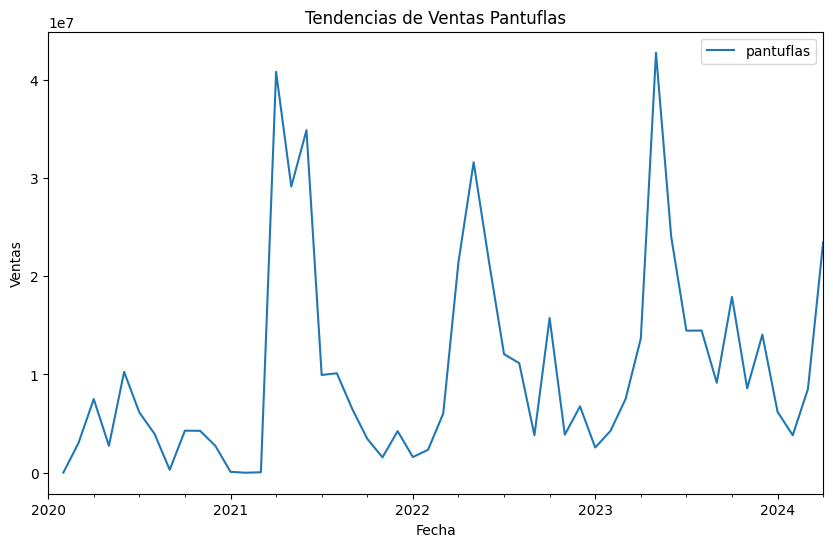

In [72]:
df_filtrado['month'] = pd.to_datetime(df_filtrado['month'], errors='coerce')
df_filtrado = df_filtrado.dropna(subset=['month'])
df_filtrado.set_index('month', inplace=True)
monthly_sales = df_filtrado.groupby('product_type').resample('M')['total_sales'].sum().unstack(level=0)

product_types_to_plot = ['pantuflas']
plt.figure(figsize=(10, 6))
for product_type in product_types_to_plot:
    if product_type in monthly_sales.columns:
        monthly_sales[product_type].plot(label=product_type)
plt.title('Tendencias de Ventas Pantuflas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


In [73]:
#N° Ordenes por año
ordenes_anuales = (df_filtrado[df_filtrado['product_type'] == 'pantuflas']).resample('Y')['orders'].sum()
print(ordenes_anuales)

month
2020-12-31     2006
2021-12-31     6088
2022-12-31     7636
2023-12-31    10239
2024-12-31     2323
Freq: A-DEC, Name: orders, dtype: int64


In [74]:
#Obtenemos las ganacias por la categoria pantuflas
ventas_totales_pantuflas = df_filtrado_copia[df_filtrado_copia['product_type'] == 'pantuflas'] \
                            .groupby('combined_title')['total_sales'].sum().reset_index()
ventas_totales_pantuflas.rename(columns={'total_sales': 'ventas_totales'}, inplace=True)
ventas_totales_pantuflas = ventas_totales_pantuflas.sort_values(by='ventas_totales', ascending=False)
total_ventas_carpas = ventas_totales_pantuflas['ventas_totales'].sum()
ventas_totales_pantuflas['Porcentaje de Ventas (%)'] = (ventas_totales_pantuflas['ventas_totales'] / total_ventas_carpas) * 100
pd.options.display.float_format = '{:.2f}'.format
print(ventas_totales_pantuflas.to_string(index=False))

                                                                      combined_title  ventas_totales  Porcentaje de Ventas (%)
                                                  pantufla futaleufú - Negra / 41-42        26003138                      4.82
                                                  pantufla futaleufú - Negra / 43-44        26002695                      4.82
                                  pantufla futaleufú negra - atakama outdoor - 42/43        18178143                      3.37
                                                   pantufla futaleufú - Azul / 41-42        15421316                      2.86
                                                   pantufla futaleufú - Azul / 43-44        13929109                      2.58
                                            pantufla futaleufú negra - 37/38 / Negro        13619631                      2.53
                                           pantufla futaleufú adulto - 42/43 / Negro        13129913           

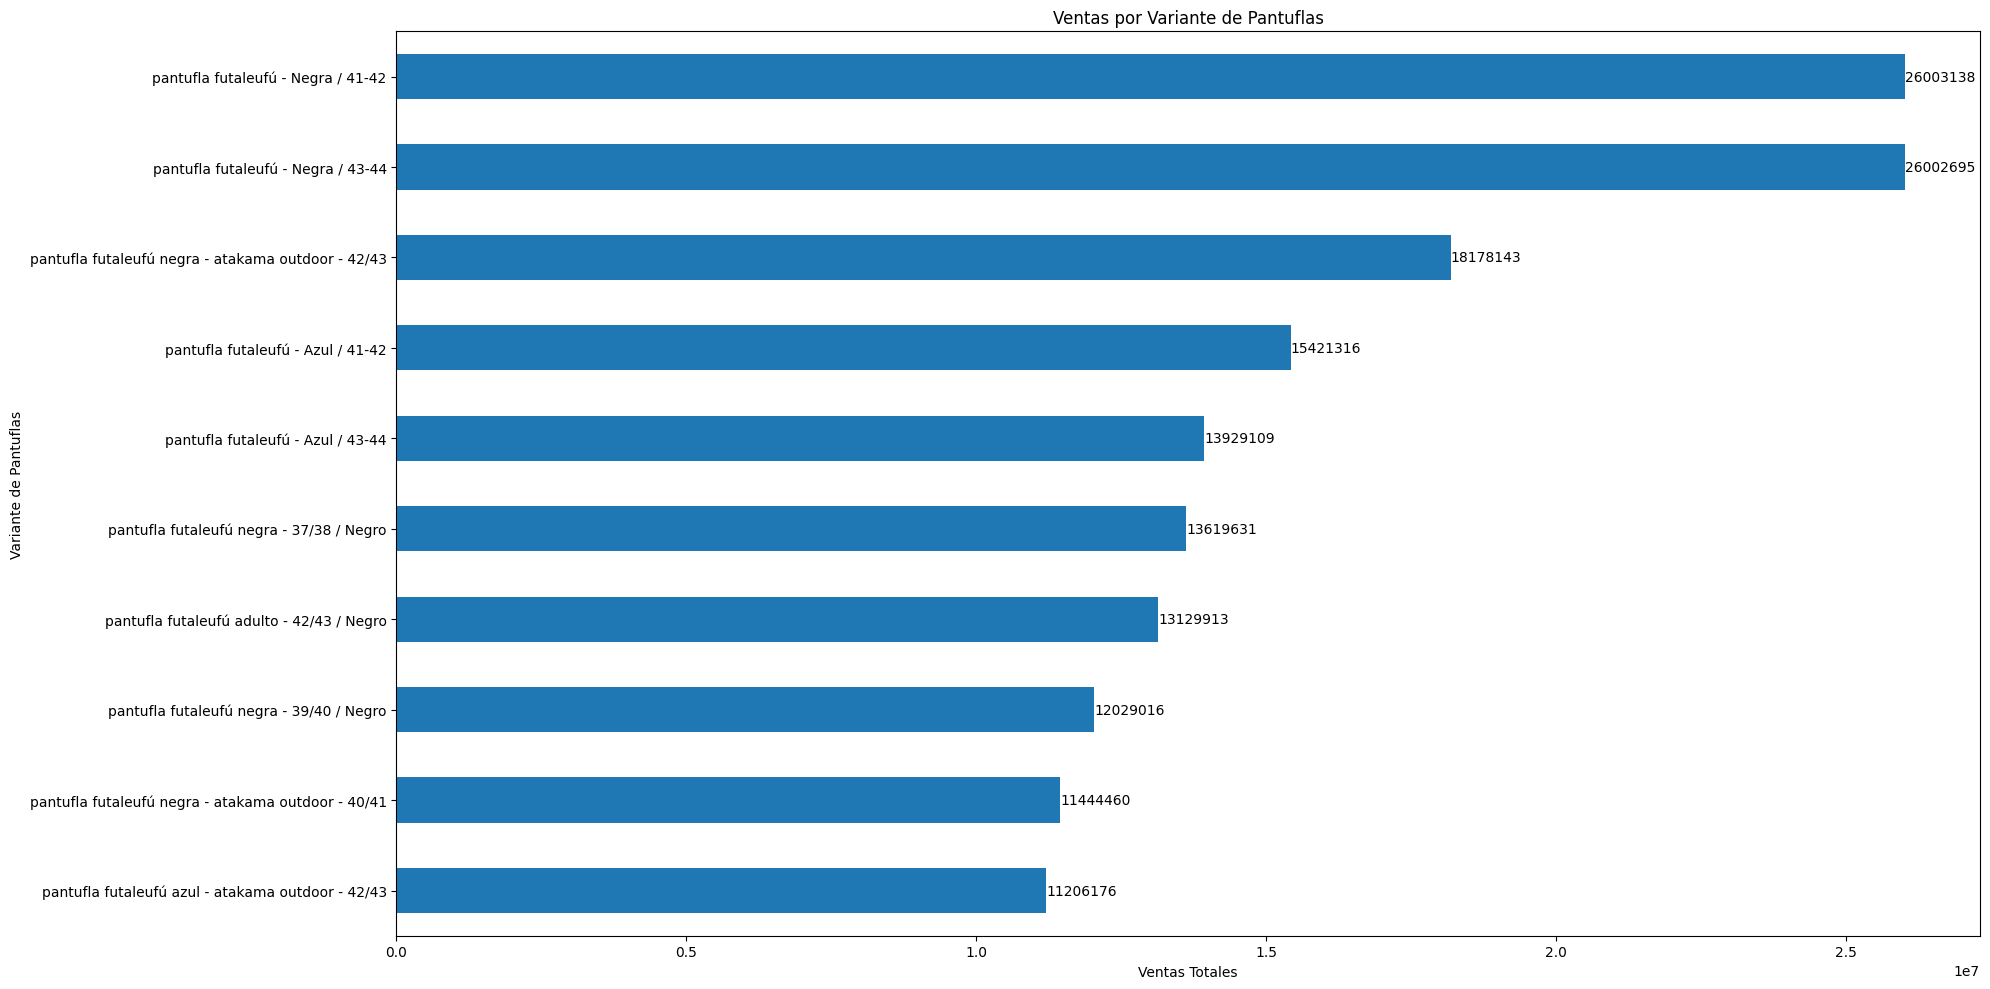

In [75]:
ventas_por_variante = df_filtrado_copia[df_filtrado_copia['product_type'] == 'pantuflas'].groupby('combined_title')['total_sales'].sum()
ventas_por_variante = ventas_por_variante.sort_values(ascending=True).tail(10)
ax = ventas_por_variante.plot(kind='barh', figsize=(20, 10))
plt.title('Ventas por Variante de Pantuflas')
plt.ylabel('Variante de Pantuflas')
plt.xlabel('Ventas Totales')
plt.yticks(rotation=0)
for i, v in enumerate(ventas_por_variante):
    ax.text(v + 10, i, str(round(v, 2)), va='center')
plt.tight_layout()
plt.show()

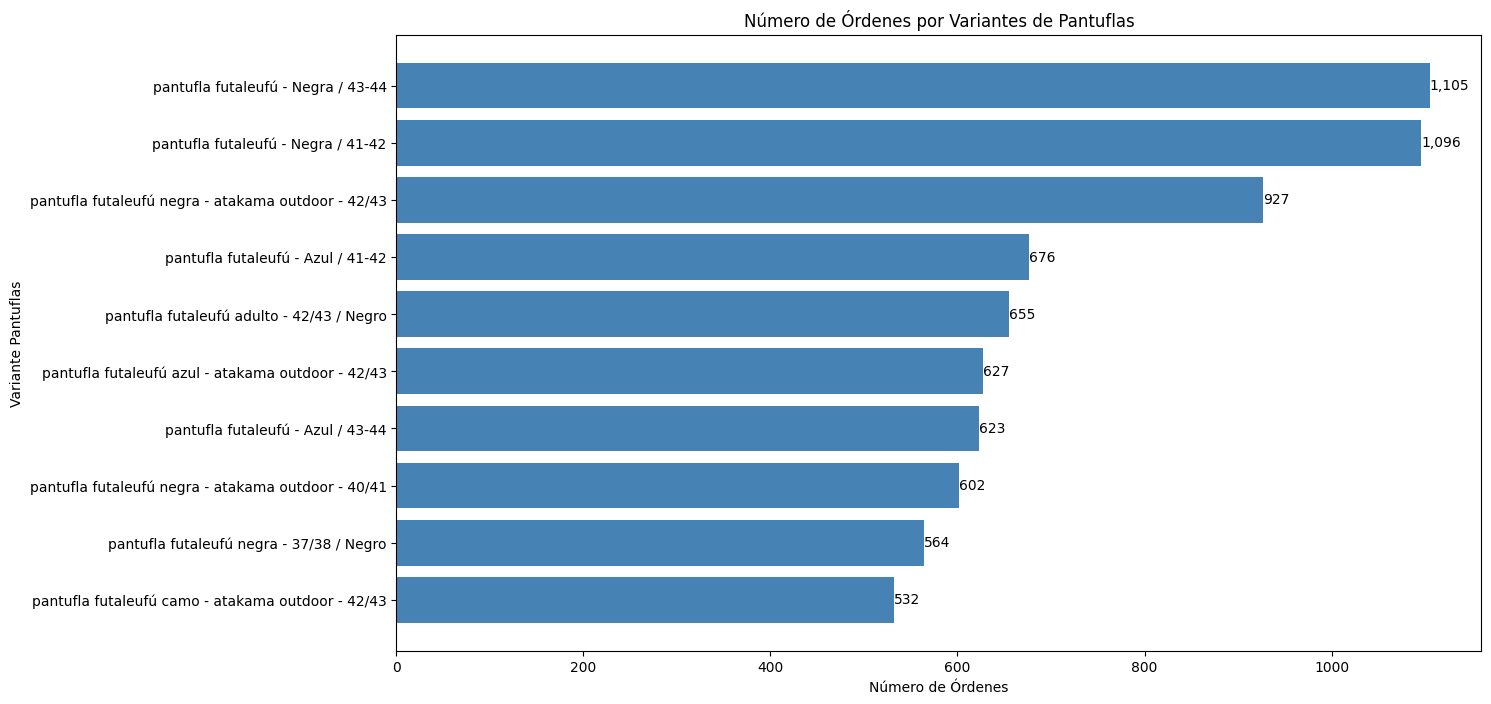

In [76]:
pantuflas = df_filtrado_copia[df_filtrado_copia['product_type'] == 'pantuflas']
distribucion_pantuflas= pantuflas.groupby('combined_title')['orders'].sum().reset_index()
distribucion_pantuflas.rename(columns={'orders': 'num_ordenes'}, inplace=True)
distribucion_pantuflas = distribucion_pantuflas.sort_values(by='num_ordenes', ascending=False).head(10)

# Gráfico de barras por número de órdenes de pantuflas
plt.figure(figsize=(14, 8))
bars = plt.barh(distribucion_pantuflas['combined_title'], distribucion_pantuflas['num_ordenes'], color='steelblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', color='black', fontsize=10)
plt.xlabel('Número de Órdenes')
plt.ylabel('Variante Pantuflas')
plt.title('Número de Órdenes por Variantes de Pantuflas')
plt.gca().invert_yaxis()
plt.show()

CARPAS

In [77]:
#N° Ordenes por año
ordenes_anuales = (df_filtrado[df_filtrado['product_type'] == 'carpas']).resample('Y')['orders'].sum()
print(ordenes_anuales)

month
2020-12-31     11
2021-12-31    248
2022-12-31    369
2023-12-31    246
2024-12-31    163
Freq: A-DEC, Name: orders, dtype: int64


In [78]:
#ventas anuales
ventas_anuales_carpa = (df_filtrado[df_filtrado['product_type'] == 'carpas']).resample('Y')['total_sales'].sum()
print(ventas_anuales_carpa)

month
2020-12-31     1763876
2021-12-31    28584086
2022-12-31    59694350
2023-12-31    31537931
2024-12-31    18983663
Freq: A-DEC, Name: total_sales, dtype: int64


In [79]:
#Obtenemos las ganacias por la categoria carpas
ventas_totales_carpas = df_filtrado[df_filtrado['product_type'] == 'carpas'] \
                            .groupby('product_title')['total_sales'].sum().reset_index()
ventas_totales_carpas.rename(columns={'total_sales': 'ventas_totales'}, inplace=True)
ventas_totales_carpas = ventas_totales_carpas.sort_values(by='ventas_totales', ascending=False)
total_ventas_carpas = ventas_totales_carpas['ventas_totales'].sum()
ventas_totales_carpas['Porcentaje de Ventas (%)'] = (ventas_totales_carpas['ventas_totales'] / total_ventas_carpas) * 100
pd.options.display.float_format = '{:.2f}'.format
print(ventas_totales_carpas.to_string(index=False))


                                   product_title  ventas_totales  Porcentaje de Ventas (%)
                              carpa carelmapu 2p        56729978                     40.36
 carpa instantanea hornitos 6p - atakama outdoor        51082460                     36.34
carpa instantanea portofino 4p - atakama outdoor        25156029                     17.90
                            carpa totoralillo 4p         7595439                      5.40


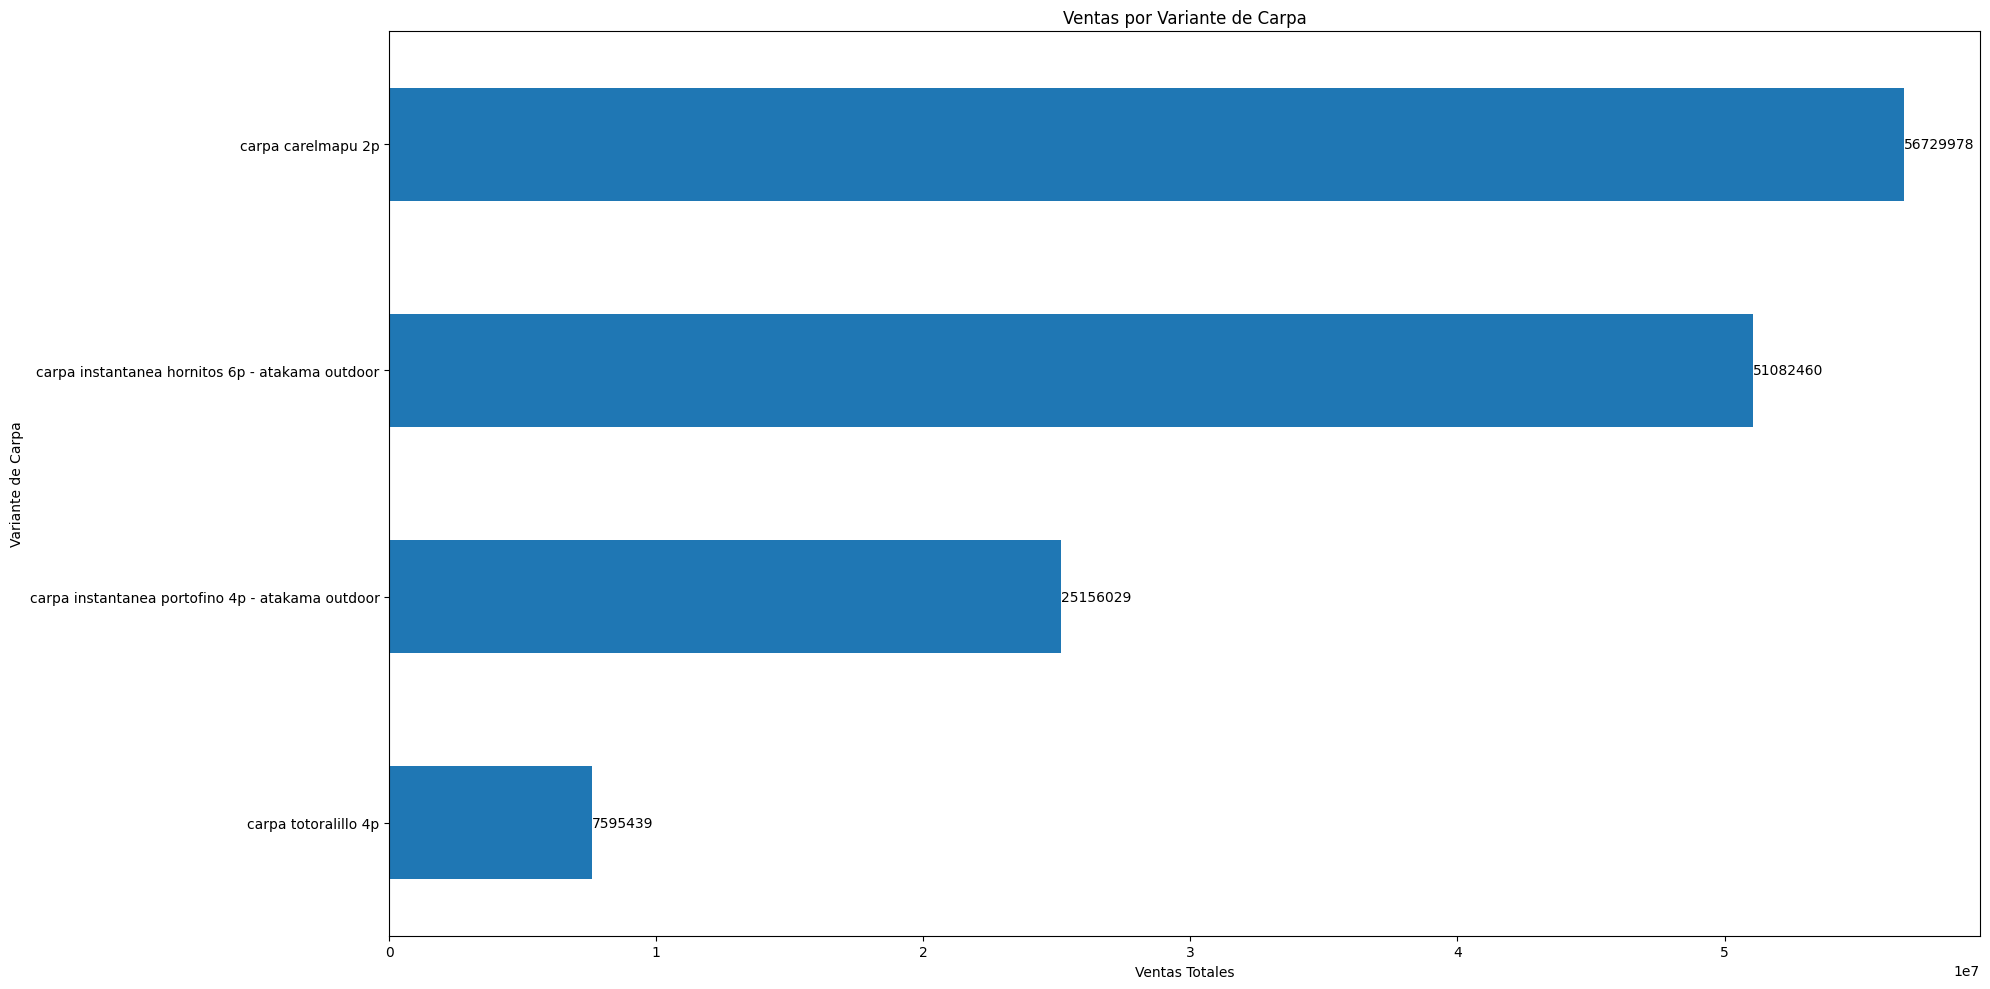

In [80]:
ventas_por_variante = df_final[df_final['product_type'] == 'carpas'].groupby('product_title')['total_sales'].sum()
ventas_por_variante = ventas_por_variante.sort_values(ascending=True)
ax = ventas_por_variante.plot(kind='barh', figsize=(20, 10))
plt.title('Ventas por Variante de Carpa')
plt.ylabel('Variante de Carpa')
plt.xlabel('Ventas Totales')
plt.yticks(rotation=0)
for i, v in enumerate(ventas_por_variante):
    ax.text(v + 10, i, str(round(v, 2)), va='center')
plt.tight_layout()
plt.show()

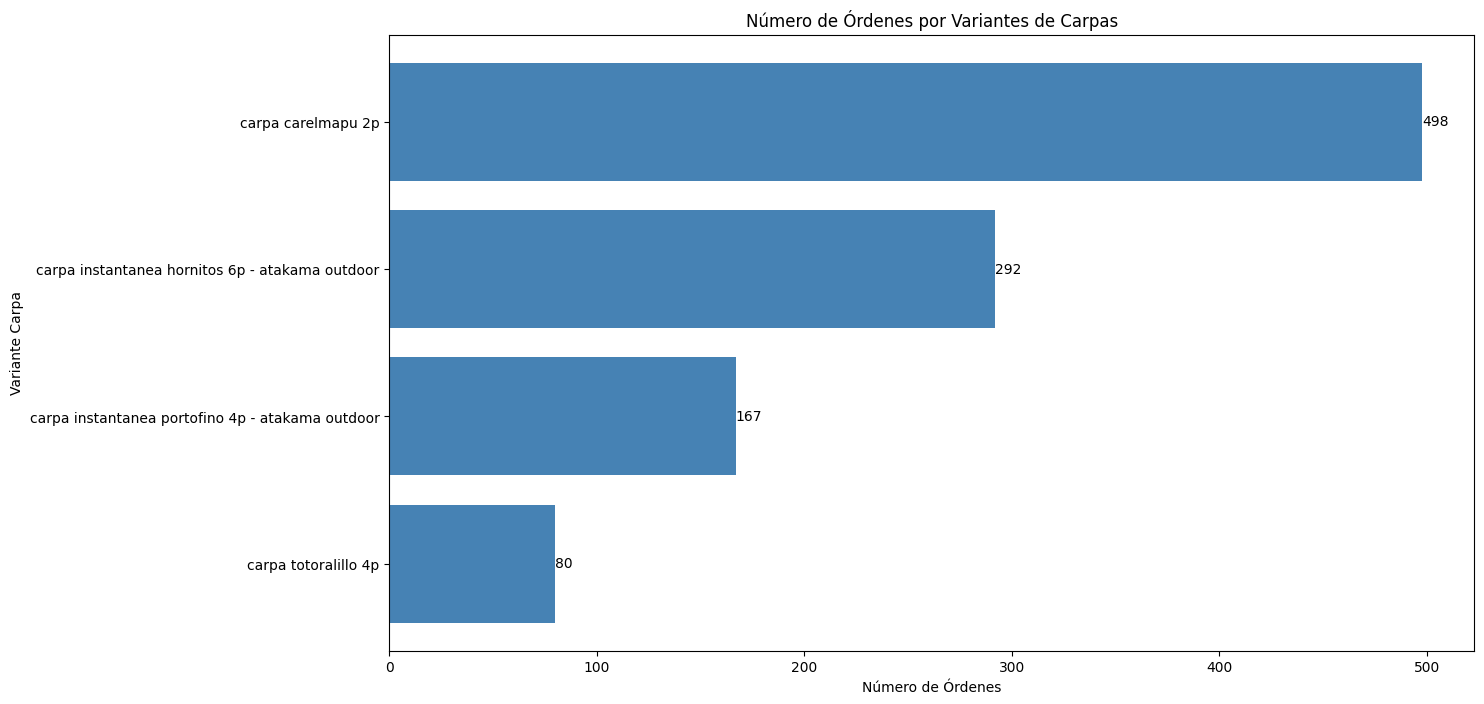

In [81]:
carpas = df_filtrado[df_filtrado['product_type'] == 'carpas']
distribucion_carpas = carpas.groupby('product_title')['orders'].sum().reset_index()
distribucion_carpas.rename(columns={'orders': 'num_ordenes'}, inplace=True)
distribucion_carpas = distribucion_carpas.sort_values(by='num_ordenes', ascending=False)

#Gráfico de barras ordenes carpas
plt.figure(figsize=(14, 8))
bars = plt.barh(distribucion_carpas['product_title'], distribucion_carpas['num_ordenes'], color='steelblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', color='black', fontsize=10)
plt.xlabel('Número de Órdenes')
plt.ylabel('Variante Carpa')
plt.title('Número de Órdenes por Variantes de Carpas')
plt.gca().invert_yaxis()
plt.show()

MOCHILA

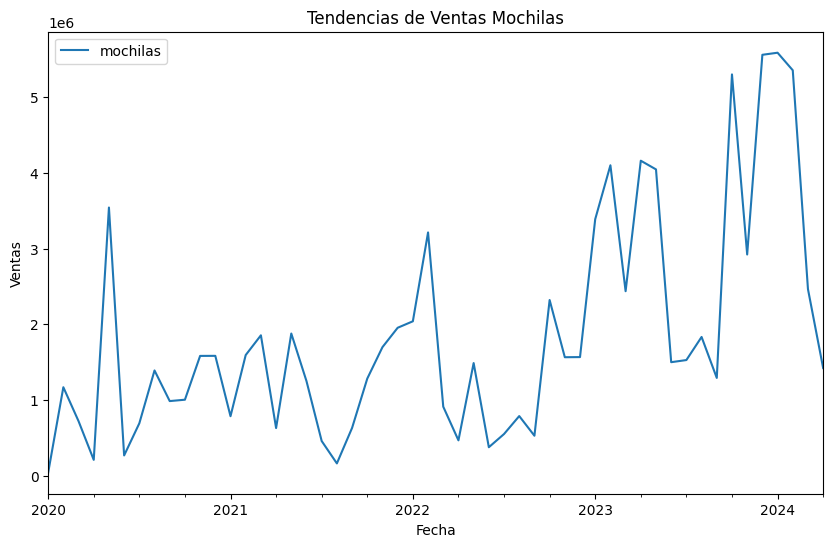

In [82]:
monthly_sales = df_filtrado.groupby('product_type').resample('M')['total_sales'].sum().unstack(level=0)
product_types_to_plot = ['mochilas']
for product_type in product_types_to_plot:
    if product_type in monthly_sales.columns:
        monthly_sales[product_type].plot(label=product_type, figsize=(10, 6))
plt.title('Tendencias de Ventas Mochilas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [83]:
#ventas anuales
ventas_anuales_mochilas = (df_filtrado[df_filtrado['product_type'] == 'mochilas']).resample('Y')['total_sales'].sum()
print(ventas_anuales_mochilas)

month
2020-12-31    13196396
2021-12-31    14188787
2022-12-31    15826852
2023-12-31    38085036
2024-12-31    14836007
Freq: A-DEC, Name: total_sales, dtype: int64


In [84]:
#N° Ordenes por año
ordenes_anuales = (df_filtrado[df_filtrado['product_type'] == 'mochilas']).resample('Y')['orders'].sum()
print(ordenes_anuales)

month
2020-12-31     532
2021-12-31     558
2022-12-31     674
2023-12-31    1074
2024-12-31     218
Freq: A-DEC, Name: orders, dtype: int64


In [85]:
#Obtenemos las ganacias por la categoria carpas
ventas_totales_carpas = df_filtrado[df_filtrado['product_type'] == 'mochilas'] \
                            .groupby('product_title')['total_sales'].sum().reset_index()
ventas_totales_carpas.rename(columns={'total_sales': 'ventas_totales'}, inplace=True)
ventas_totales_carpas = ventas_totales_carpas.sort_values(by='ventas_totales', ascending=False)
total_ventas_carpas = ventas_totales_carpas['ventas_totales'].sum()
ventas_totales_carpas['Porcentaje de Ventas (%)'] = (ventas_totales_carpas['ventas_totales'] / total_ventas_carpas) * 100
pd.options.display.float_format = '{:.2f}'.format
print(ventas_totales_carpas.to_string(index=False))

                                                product_title  ventas_totales  Porcentaje de Ventas (%)
                                  mochila plegable carbon 28l        15886274                     16.53
                  mochila mochilera torres del paine 60+10 lt        13409697                     13.95
                                          mochila cochamó 25l        11389424                     11.85
                                    mochila portabebé leonera        10134450                     10.54
                               mochila plegable pochoco 16 lt         9850496                     10.25
                         mochila outdoor/urbana cochamó 25 lt         7363193                      7.66
                             mochila plegable manquehue 28 lt         5997388                      6.24
                                 mochila torres del paine 60l         3500278                      3.64
 mochila plegable pochoco 16lt gris grafico - atakama outdoor   

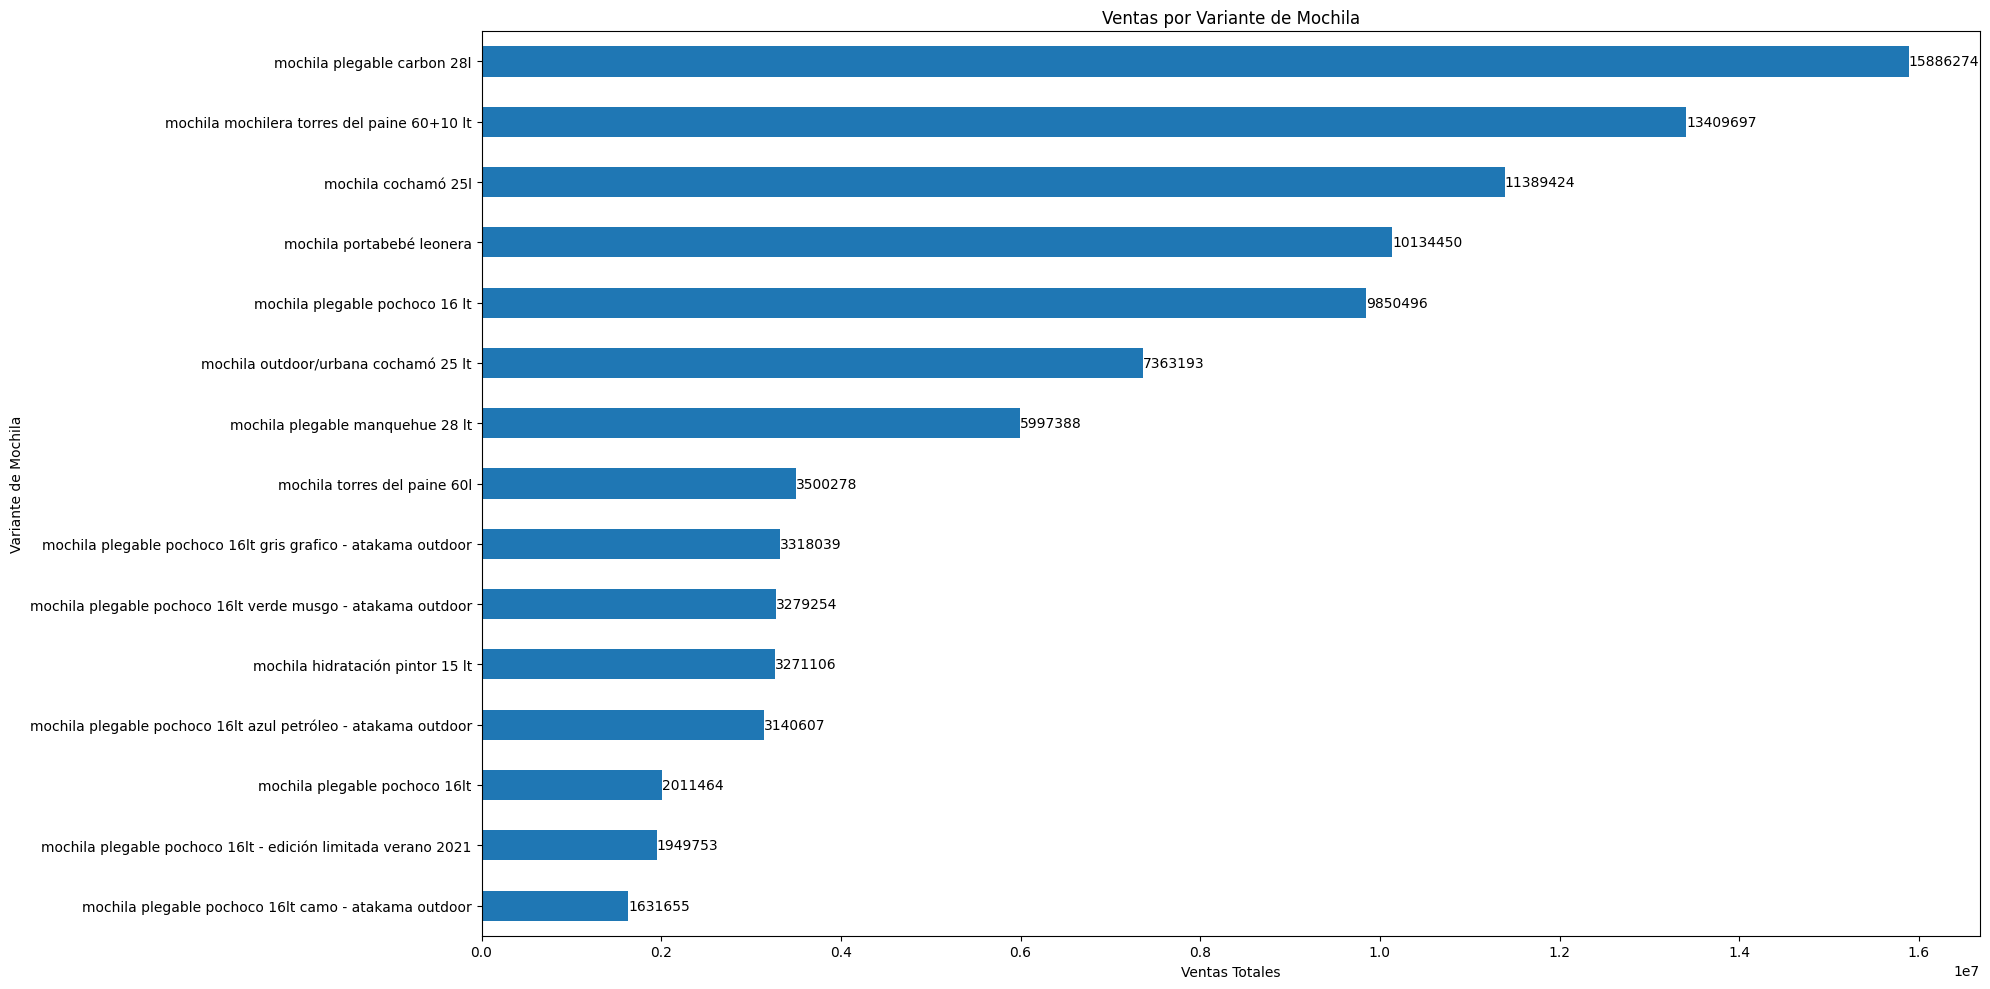

In [86]:
ventas_por_variante = df_filtrado[df_filtrado['product_type'] == 'mochilas'].groupby('product_title')['total_sales'].sum()
ventas_por_variante = ventas_por_variante.sort_values(ascending=True)
ax = ventas_por_variante.plot(kind='barh', figsize=(20, 10))
plt.title('Ventas por Variante de Mochila')
plt.ylabel('Variante de Mochila')
plt.xlabel('Ventas Totales')
plt.yticks(rotation=0)
for i, v in enumerate(ventas_por_variante):
    ax.text(v + 10, i, str(round(v, 2)), va='center')
plt.tight_layout()
plt.show()

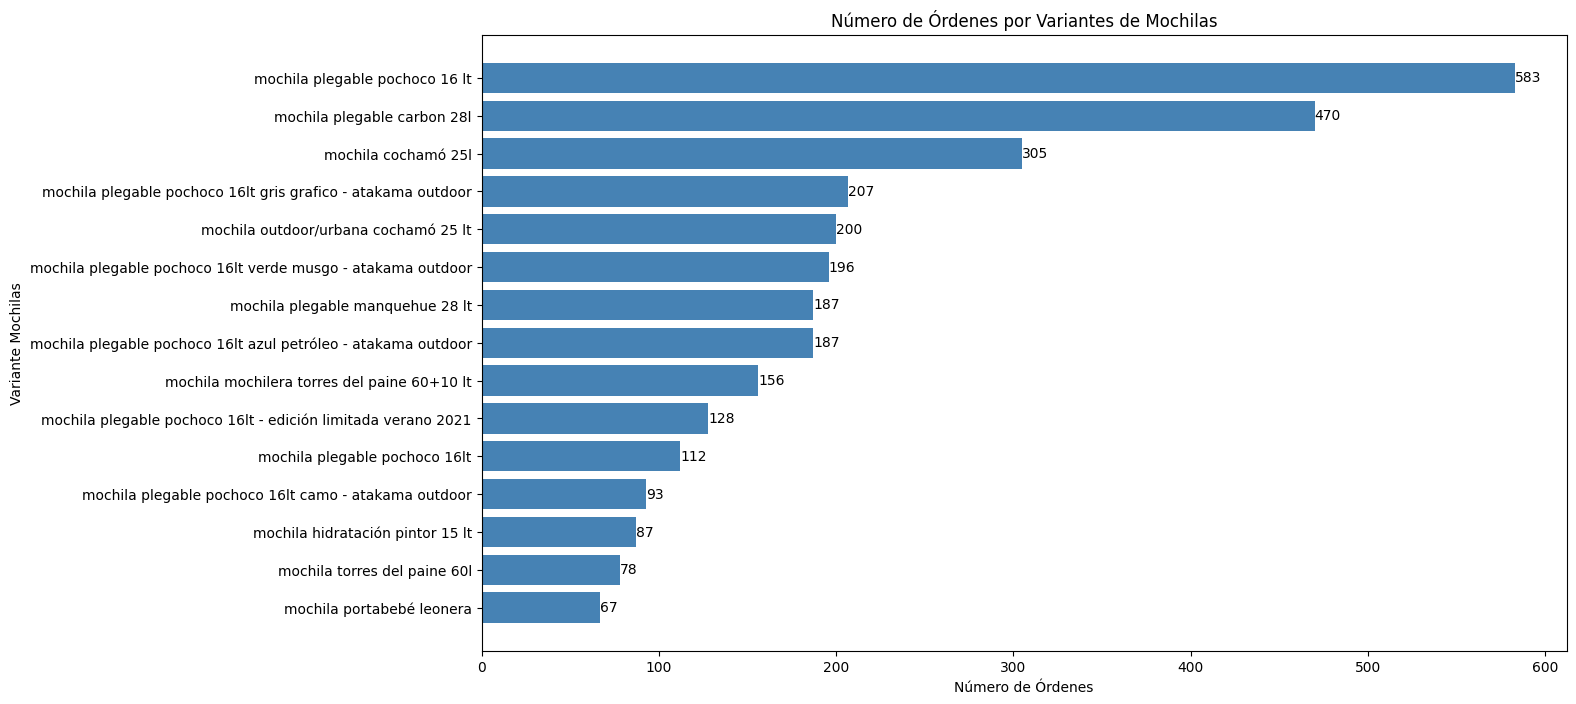

In [87]:
mochilas = df_filtrado[df_filtrado['product_type'] == 'mochilas']
distribucion_mochilas = mochilas.groupby('product_title')['orders'].sum().reset_index()
distribucion_mochilas.rename(columns={'orders': 'num_ordenes'}, inplace=True)
distribucion_mochilas = distribucion_mochilas.sort_values(by='num_ordenes', ascending=False)

# Gráfico de barras n° de ordenes mochilas
plt.figure(figsize=(14, 8))
bars = plt.barh(distribucion_mochilas['product_title'], distribucion_mochilas['num_ordenes'], color='steelblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', color='black', fontsize=10)
plt.xlabel('Número de Órdenes')
plt.ylabel('Variante Mochilas')
plt.title('Número de Órdenes por Variantes de Mochilas')
plt.gca().invert_yaxis()
plt.show()

In [88]:
df_filtrado.index = pd.to_datetime(df_filtrado.index)
df_filtrado['year'] = df_filtrado.index.year
# Agrupar por año y sumar las ventas
ventas_por_año = df_filtrado.groupby('year')['total_sales'].sum().reset_index()
print("Ventas por Año:")
print(ventas_por_año)

Ventas por Año:
   year  total_sales
0  2020    103391184
1  2021    248235769
2  2022    313388929
3  2023    402764107
4  2024    130602801


In [89]:
#Obtenemos las ganacias por la categoria carpas
ventas_totales_carpas = df_filtrado[df_filtrado['product_type'] == 'mochilas'] \
                            .groupby('product_title')['total_sales'].sum().reset_index()
ventas_totales_carpas.rename(columns={'total_sales': 'ventas_totales'}, inplace=True)
ventas_totales_carpas = ventas_totales_carpas.sort_values(by='ventas_totales', ascending=False)
total_ventas_carpas = ventas_totales_carpas['ventas_totales'].sum()
ventas_totales_carpas['Porcentaje de Ventas (%)'] = (ventas_totales_carpas['ventas_totales'] / total_ventas_carpas) * 100
pd.options.display.float_format = '{:.2f}'.format
print(ventas_totales_carpas.to_string(index=False))

                                                product_title  ventas_totales  Porcentaje de Ventas (%)
                                  mochila plegable carbon 28l        15886274                     16.53
                  mochila mochilera torres del paine 60+10 lt        13409697                     13.95
                                          mochila cochamó 25l        11389424                     11.85
                                    mochila portabebé leonera        10134450                     10.54
                               mochila plegable pochoco 16 lt         9850496                     10.25
                         mochila outdoor/urbana cochamó 25 lt         7363193                      7.66
                             mochila plegable manquehue 28 lt         5997388                      6.24
                                 mochila torres del paine 60l         3500278                      3.64
 mochila plegable pochoco 16lt gris grafico - atakama outdoor   

Devoluciones

In [90]:
#Obtener el valor total de devoluciones en terminos monetarios se considera el conjunto de datos
returns_df = df_filtrado[df_filtrado['sale_kind'] == 'return']
total_returns = returns_df['total_sales'].sum()
print(f"El valor total de returns es: {total_returns}")

El valor total de returns es: -41506144


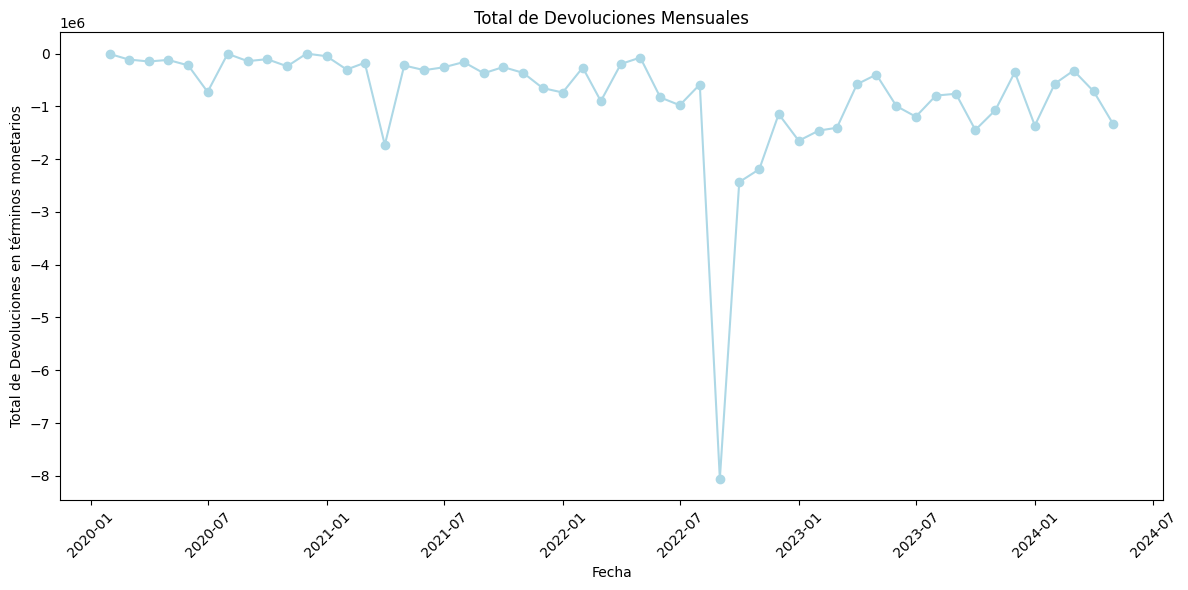

In [91]:
returns_df.index = pd.to_datetime(returns_df.index, errors='coerce')
total_returns_by_month = returns_df['total_sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(total_returns_by_month.index, total_returns_by_month.values, marker='o', linestyle='-', color='lightblue')
plt.title('Total de Devoluciones Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Total de Devoluciones en términos monetarios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
total_returns_by_year = returns_df['total_sales'].resample('Y').sum()
df_returns_by_year = pd.DataFrame(total_returns_by_year)
df_returns_by_year.columns = ['Total Devoluciones']
df_returns_by_year.index = df_returns_by_year.index.year
df_returns_by_year.index.name = 'Año'
print(df_returns_by_year)

      Total Devoluciones
Año                     
2020            -1881614
2021            -5548184
2022           -19312046
2023           -11824296
2024            -2940004


In [93]:
print("Cantidad de devoluciones por tipo de producto:\n",returns_df['product_type'].value_counts())

Cantidad de devoluciones por tipo de producto:
 product_type
pantuflas                 565
mochilas                  107
carpas                     57
toallas                    46
poleras                    40
sillas                     38
donación                   36
gorros y jockeys           33
botella térmica            33
sacos de dormir            30
linternas                  29
almohadas                  29
hamacas                    25
vasos                      23
banano plegable            23
bolsos                     21
tazón                      18
bananos                    18
tetera                     16
manta térmica              14
parka                      11
botellas                   10
matera térmica             10
cocinilla                   8
set bowls                   8
termos                      8
colchonetas                 7
test                        7
bolsa seca                  7
cafeteras                   5
mesas                       5
materas  

<ipython-input-94-466c41158852>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_10_product_types.values, y=top_10_product_types.index, palette="pastel")


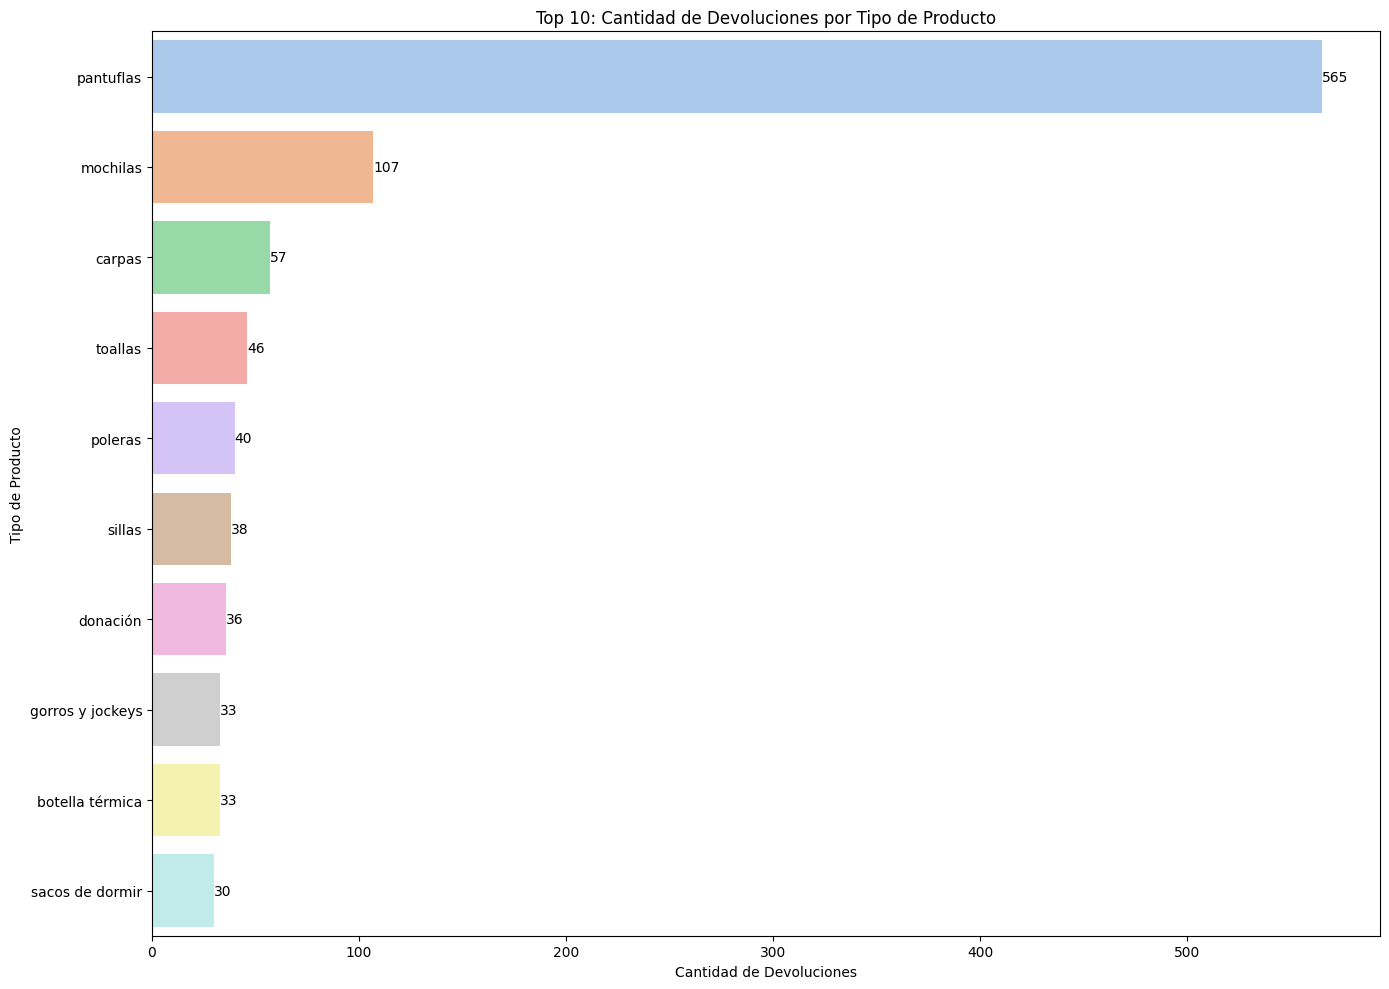

In [94]:
top_10_product_types = (returns_df['product_type'].value_counts()).head(10)

plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x=top_10_product_types.values, y=top_10_product_types.index, palette="pastel")
plt.xlabel('Cantidad de Devoluciones')
plt.ylabel('Tipo de Producto')
plt.title('Top 10: Cantidad de Devoluciones por Tipo de Producto')
for index, value in enumerate(top_10_product_types.values):
    plt.text(value, index, str(value), va='center')
plt.tight_layout()
plt.show()

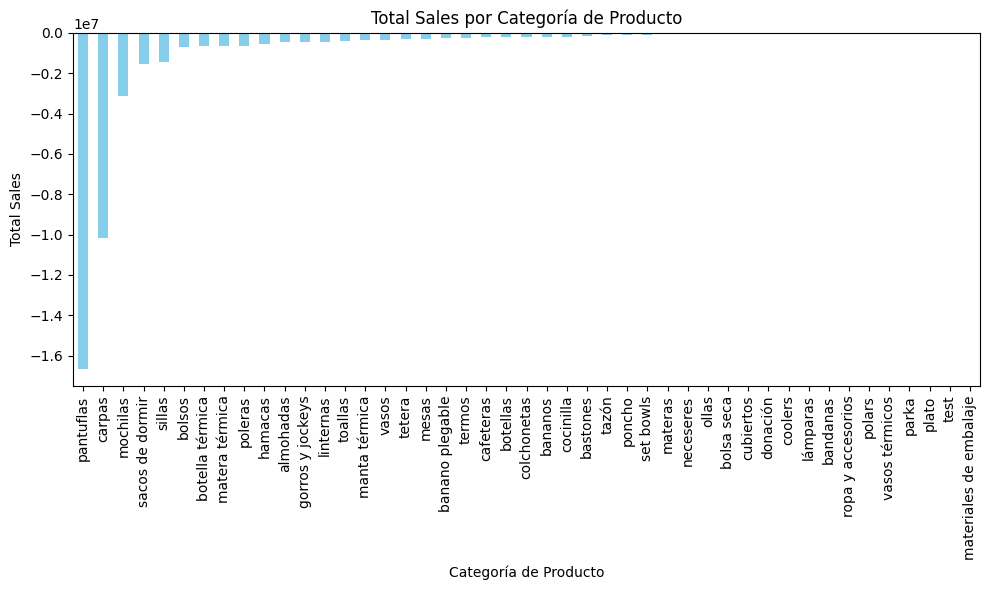

In [95]:
total_sales_returns= returns_df.groupby('product_type')['total_sales'].sum()
total_sales_returns = total_sales_returns.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
total_sales_returns.plot(kind='bar', color='skyblue')
plt.title('Total Sales por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [96]:
total_ventas = returns_df['total_sales'].sum()
total_sales_returns = returns_df.groupby('product_type')['total_sales'].sum().reset_index()
total_sales_returns = total_sales_returns.sort_values(by='total_sales', ascending=True)
total_sales_returns['Porcentaje de Devoluciones (%)'] = (total_sales_returns['total_sales'] / total_ventas) * 100
print(total_sales_returns)


              product_type  total_sales  Porcentaje de Devoluciones (%)
28               pantuflas    -16661204                           40.14
10                  carpas    -10183340                           24.53
25                mochilas     -3111382                            7.50
35         sacos de dormir     -1542552                            3.72
37                  sillas     -1432474                            3.45
6                   bolsos      -723660                            1.74
7          botella térmica      -665800                            1.60
21          matera térmica      -663010                            1.60
32                 poleras      -642710                            1.55
17                 hamacas      -572954                            1.38
0                almohadas      -460812                            1.11
16        gorros y jockeys      -455779                            1.10
18               linternas      -433390                         

ANÁLISIS POR REGION

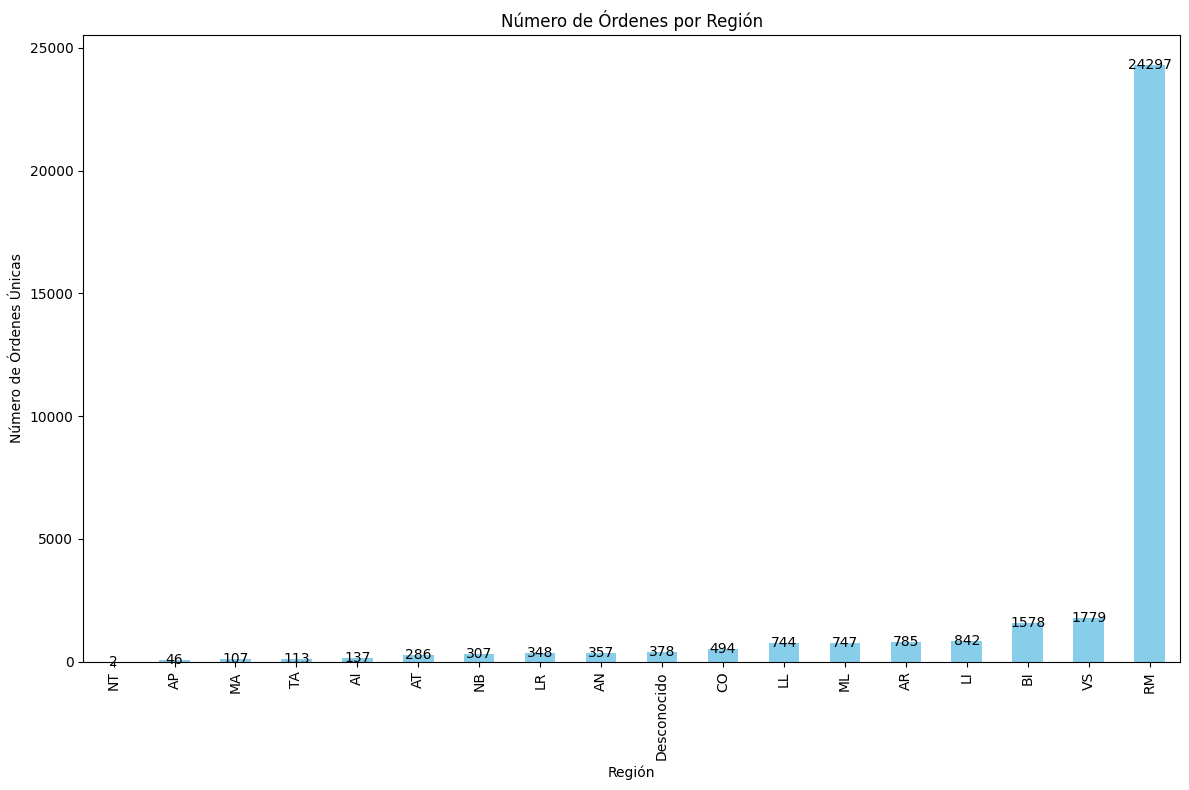

In [97]:
conteo_orders_por_region = df_envios.groupby('Default Address Province Code')['order_id'].nunique()
plt.figure(figsize=(12, 8))
bars = conteo_orders_por_region.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Número de Órdenes por Región')
plt.ylabel('Número de Órdenes Únicas')
plt.xlabel('Región')
plt.gca().invert_xaxis()
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             '{:.0f}'.format(bar.get_height()),
             va='center', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

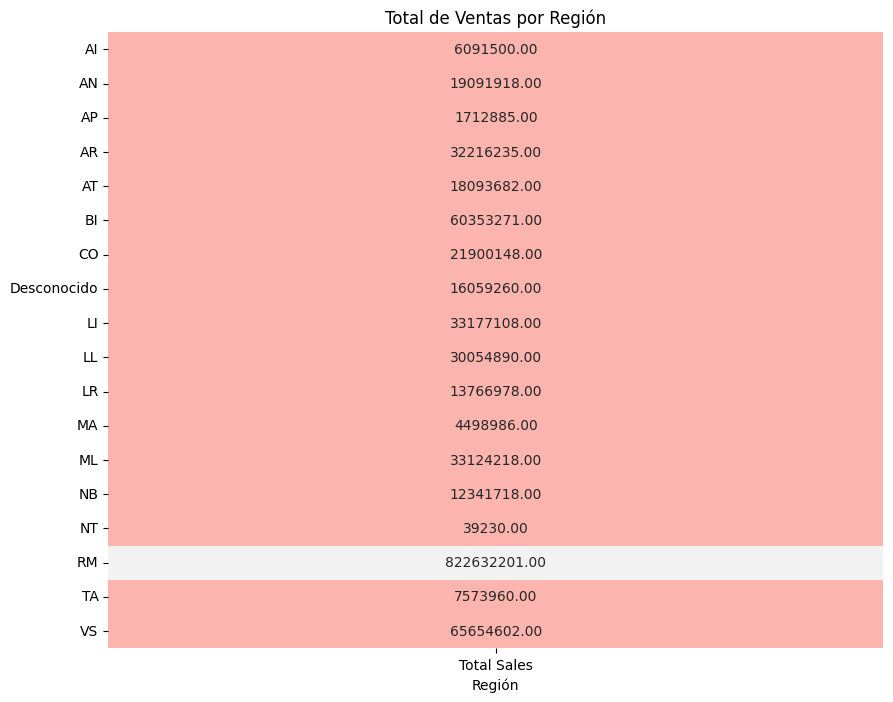

In [98]:
total_ventas_por_region = df_filtrado.groupby('Default Address Province Code')['total_sales'].sum()
heatmap_data = pd.DataFrame({'Region': total_ventas_por_region.index, 'Total Sales': total_ventas_por_region.values})
heatmap_data = heatmap_data.sort_values(by='Total Sales')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.pivot_table(index='Region', values='Total Sales', aggfunc='sum').fillna(0),
            annot=True, cmap='Pastel1', fmt='.2f', cbar=False)
plt.title('Total de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('')
plt.show()

In [99]:
total_ventas_por_region = df_filtrado.groupby('Default Address Province Code')['total_sales'].sum()
total_ordenes_por_region = df_filtrado.groupby('Default Address Province Code')['order_id'].nunique()

resumen_por_region = pd.DataFrame({
    'Total Ventas': total_ventas_por_region,
    'Total Órdenes': total_ordenes_por_region
})

resumen_por_region['% Ventas'] = (resumen_por_region['Total Ventas'] / resumen_por_region['Total Ventas'].sum()) * 100
resumen_por_region['% Órdenes'] = (resumen_por_region['Total Órdenes'] / resumen_por_region['Total Órdenes'].sum()) * 100

resumen_por_region = resumen_por_region.sort_values(by='Total Ventas', ascending=False)

print("Resumen de Ventas y Órdenes por Región:")
print(resumen_por_region)

Resumen de Ventas y Órdenes por Región:
                               Total Ventas  Total Órdenes  % Ventas  \
Default Address Province Code                                          
RM                                822632201          24311     68.65   
VS                                 65654602           1779      5.48   
BI                                 60353271           1579      5.04   
LI                                 33177108            842      2.77   
ML                                 33124218            748      2.76   
AR                                 32216235            785      2.69   
LL                                 30054890            745      2.51   
CO                                 21900148            494      1.83   
AN                                 19091918            359      1.59   
AT                                 18093682            286      1.51   
Desconocido                        16059260            379      1.34   
LR                      

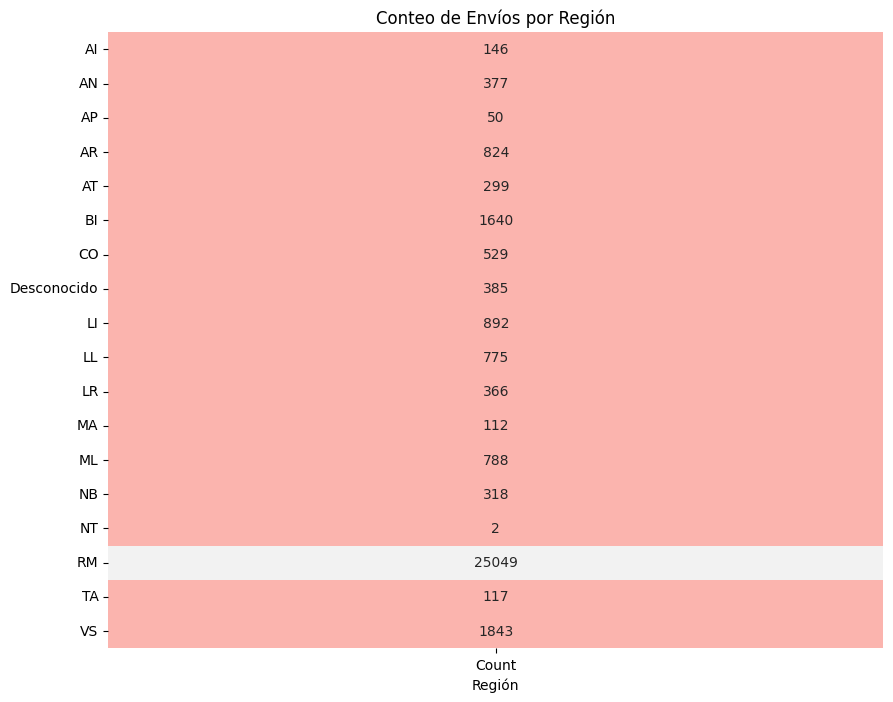

In [100]:
conteo_regiones = df_envios['Default Address Province Code'].value_counts()
heatmap_data = pd.DataFrame({'Region': conteo_regiones.index, 'Count': conteo_regiones.values})
heatmap_data = heatmap_data.sort_values(by='Count')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.pivot_table(index='Region', values='Count', aggfunc='sum').fillna(0),
            annot=True, cmap='Pastel1', fmt='g', cbar=False)
plt.title('Conteo de Envíos por Región')
plt.xlabel('Región')
plt.ylabel('')
plt.show()

Clientes

In [101]:
print("clientes uncios:", df_filtrado['customer_id'].nunique())

clientes uncios: 24287


In [102]:
df_aggregated = df_filtrado_copia.groupby('order_name').agg({
    'month': 'first',
    'total_sales': 'sum',
    'Total Spent': 'first',
    'month': 'first',
    'product_id': 'first',
    'order_id': 'first',
    'variant_sku': 'first',
    'financial_status': 'first',
    'customer_id': 'first',
    'referrer_source': 'first',
    'referring_channel': 'first',
    'referring_traffic': 'first',
    'full name': 'first',
    'Email': 'first',
}).reset_index()
print(df_aggregated.head())

  order_name      month  total_sales Total Spent  product_id       order_id  \
0      #1002 2020-01-01            0        0.00           0  2079338758240   
1      #1003 2020-01-01        47980    58928.00           0  2079585665120   
2      #1004 2020-01-01        26392    30110.00           0  2079727190112   
3      #1005 2020-01-01        23394    28312.00           0  2081190510688   
4    #AO1006 2020-01-01        39980    43698.00           0  2083445833824   

    variant_sku financial_status    customer_id referrer_source  \
0      PLUCVR17           voided  2945859321952          Direct   
1    OPMQAZ_2LT             paid  2946064056416          Search   
2    OPMQAZ_2LT             paid  2946196013152          Direct   
3       NEVAZ17             paid  2946384658528          Search   
4  MPOCHNG_16LT             paid  2949718114400          Search   

  referring_channel referring_traffic             full name  \
0            direct            direct      Baltazar Drapela

In [103]:
purchase_frequency = df_aggregated.groupby('customer_id').size().reset_index(name='Purchase Frequency')
clientes_con_una_compra = purchase_frequency[purchase_frequency['Purchase Frequency'] == 1]
cantidad_clientes_una_compra = clientes_con_una_compra.shape[0]
print(f"Clientes con exactamente una compra: {cantidad_clientes_una_compra}")
bins = [-1, 0.5, 1.5, 3.5, 5.5, 10.5, float('inf')]
labels = ['0', '1', '2-3', '4-5', '6-10', '10+']
purchase_frequency['Frequency Segment'] = pd.cut(purchase_frequency['Purchase Frequency'], bins=bins, labels=labels, right=False)
frequency_segments = purchase_frequency['Frequency Segment'].value_counts().sort_index()
print("\nSegmentos de frecuencia:")
print(frequency_segments)

Clientes con exactamente una compra: 18616

Segmentos de frecuencia:
Frequency Segment
0           0
1       18616
2-3      4938
4-5       559
6-10      165
10+         9
Name: count, dtype: int64


In [104]:
#Gastos totales por cliente
total_spend = df_aggregated.groupby('customer_id')['total_sales'].sum().reset_index()
# Definir intervalos
bins = [-1, 9990, 19990, 39990, 99990, 500000, float('inf')]
labels = ['<9990', '10000-19990', '20000-39990', '40000-99990', '100000-500000', '500000+']
total_spend['Value Segment'] = pd.cut(total_spend['total_sales'], bins=bins, labels=labels)
# Contar clientes en cada segmento de valor
value_segments = total_spend['Value Segment'].value_counts().sort_index()
print(value_segments)

Value Segment
<9990             721
10000-19990      5432
20000-39990      8127
40000-99990      7504
100000-500000    2471
500000+            29
Name: count, dtype: int64


In [105]:
top_10_customers = df_aggregated.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False).head(10)
total_sales = df_aggregated['total_sales'].sum()
top_10_customers_percentage = (top_10_customers / total_sales) * 100
top_10_customers_df = pd.DataFrame({'total_sales': top_10_customers, '% of Total Sales': top_10_customers_percentage})
print("Top 10 Customers by Total Sales:")
print(top_10_customers_df)

Top 10 Customers by Total Sales:
               total_sales  % of Total Sales
customer_id                                 
5955567452395      1918486              0.16
6575174123755      1247880              0.10
2967882236000      1138083              0.09
6984083112171      1043560              0.09
4301028098205      1036134              0.09
6742762291435       959920              0.08
3144731328608       838241              0.07
6067676020971       815954              0.07
3687296827549       748163              0.06
6027603804395       720470              0.06


<ipython-input-106-dd95ea6cca33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette="pastel")


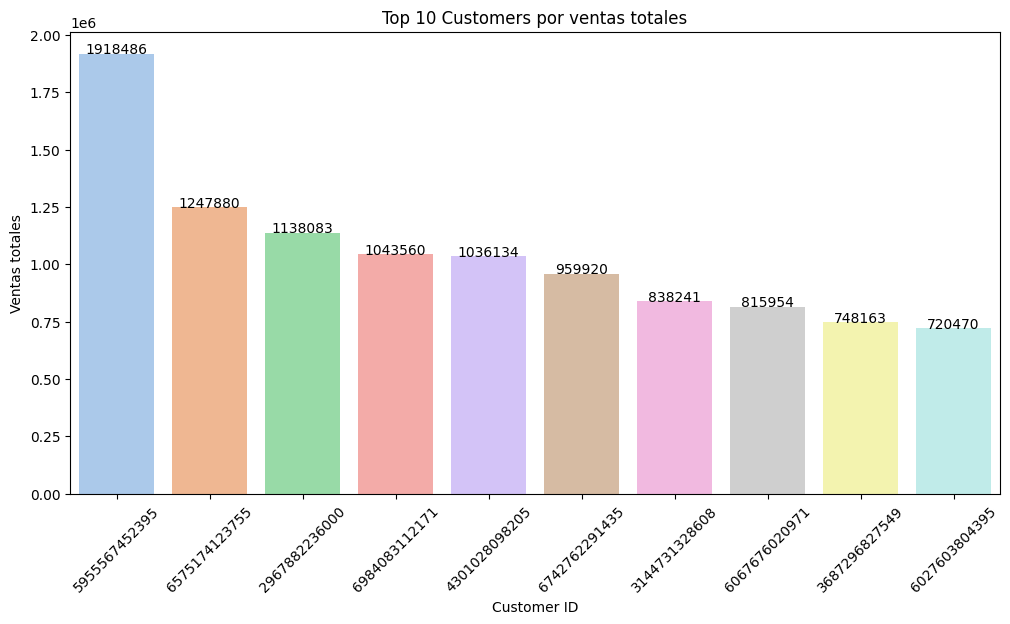

In [106]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_10_customers.index, y=top_10_customers.values, palette="pastel")
for index, value in enumerate(top_10_customers.values):
    barplot.text(index, value + 50, f'{value:.0f}', ha='center')
plt.xlabel("Customer ID")
plt.ylabel("Ventas totales")
plt.title("Top 10 Customers por ventas totales")
plt.xticks(rotation=45)
plt.show()